## Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
df = pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)

In [76]:
df

year  quarter    realgdp  realcons   realinv  realgovt  realdpi  \
1959-03-31  1959        1   2710.349    1707.4   286.898   470.045   1886.9   
1959-06-30  1959        2   2778.801    1733.7   310.859   481.301   1919.7   
1959-09-30  1959        3   2775.488    1751.8   289.226   491.260   1916.4   
1959-12-31  1959        4   2785.204    1753.7   299.356   484.052   1931.3   
1960-03-31  1960        1   2847.699    1770.5   331.722   462.199   1955.5   
...          ...      ...        ...       ...       ...       ...      ...   
2008-09-30  2008        3  13324.600    9267.7  1990.693   991.551   9838.3   
2008-12-31  2008        4  13141.920    9195.3  1857.661  1007.273   9920.4   
2009-03-31  2009        1  12925.410    9209.2  1558.494   996.287   9926.4   
2009-06-30  2009        2  12901.504    9189.0  1456.678  1023.528  10077.5   
2009-09-30  2009        3  12990.341    9256.0  1486.398  1044.088  10040.6   

                cpi      m1  tbilrate  unemp      pop  infl  realint  
1959-03-31   28.980   139.7      2.82    5.8  177.146  0.00     0.00  
1959-06-30   29.150   141.7      3.08    5.1  177.830  2.34     0.74  
1959-09-30   29.350   140.5      3.82    5.3  178.657  2.74     1.09  
1959-12-31   29.370   140.0      4.33    5.6  179.386  0.27     4.06  
1960-03-31   29.540   139.6      3.50    5.2  180.007  2.31     1.19  
...             ...     ...       ...    ...      ...   ...      ...  
2008-09-30  216.889  1474.7      1.17    6.0  305.270 -3.16     4.33  
2008-12-31  212.174  1576.5      0.12    6.9  305.952 -8.79     8.91  
2009-03-31  212.671  1592.8      0.22    8.1  306.547  0.94    -0.71  
2009-06-30  214.469  1653.6      0.18    9.2  307.226  3.37    -3.19  
2009-09-30  216.385  1673.9      0.12    9.6  308.013  3.56    -3.44  

[203 rows x 14 columns]

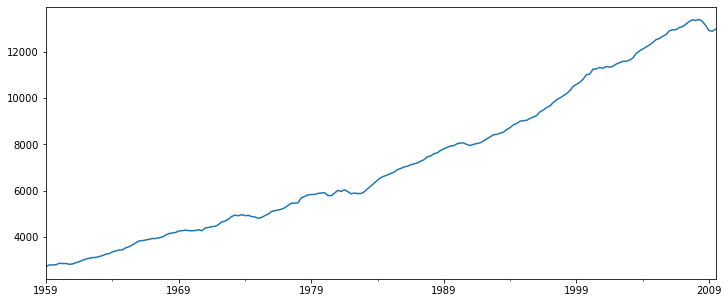

In [77]:
df['realgdp'].plot(figsize=(12,5))

In [78]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [79]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [80]:
df['trend'] = gdp_trend

In [81]:
df

year  quarter    realgdp  realcons   realinv  realgovt  realdpi  \
1959-03-31  1959        1   2710.349    1707.4   286.898   470.045   1886.9   
1959-06-30  1959        2   2778.801    1733.7   310.859   481.301   1919.7   
1959-09-30  1959        3   2775.488    1751.8   289.226   491.260   1916.4   
1959-12-31  1959        4   2785.204    1753.7   299.356   484.052   1931.3   
1960-03-31  1960        1   2847.699    1770.5   331.722   462.199   1955.5   
...          ...      ...        ...       ...       ...       ...      ...   
2008-09-30  2008        3  13324.600    9267.7  1990.693   991.551   9838.3   
2008-12-31  2008        4  13141.920    9195.3  1857.661  1007.273   9920.4   
2009-03-31  2009        1  12925.410    9209.2  1558.494   996.287   9926.4   
2009-06-30  2009        2  12901.504    9189.0  1456.678  1023.528  10077.5   
2009-09-30  2009        3  12990.341    9256.0  1486.398  1044.088  10040.6   

                cpi      m1  tbilrate  unemp      pop  infl  realint  \
1959-03-31   28.980   139.7      2.82    5.8  177.146  0.00     0.00   
1959-06-30   29.150   141.7      3.08    5.1  177.830  2.34     0.74   
1959-09-30   29.350   140.5      3.82    5.3  178.657  2.74     1.09   
1959-12-31   29.370   140.0      4.33    5.6  179.386  0.27     4.06   
1960-03-31   29.540   139.6      3.50    5.2  180.007  2.31     1.19   
...             ...     ...       ...    ...      ...   ...      ...   
2008-09-30  216.889  1474.7      1.17    6.0  305.270 -3.16     4.33   
2008-12-31  212.174  1576.5      0.12    6.9  305.952 -8.79     8.91   
2009-03-31  212.671  1592.8      0.22    8.1  306.547  0.94    -0.71   
2009-06-30  214.469  1653.6      0.18    9.2  307.226  3.37    -3.19   
2009-09-30  216.385  1673.9      0.12    9.6  308.013  3.56    -3.44   

                   trend  
1959-03-31   2670.837085  
1959-06-30   2698.712468  
1959-09-30   2726.612545  
1959-12-31   2754.612067  
1960-03-31   2782.816333  
...                  ...  
2008-09-30  13222.581545  
2008-12-31  13249.189472  
2009-03-31  13274.457706  
2009-06-30  13299.061073  
2009-09-30  13323.456243  

[203 rows x 15 columns]

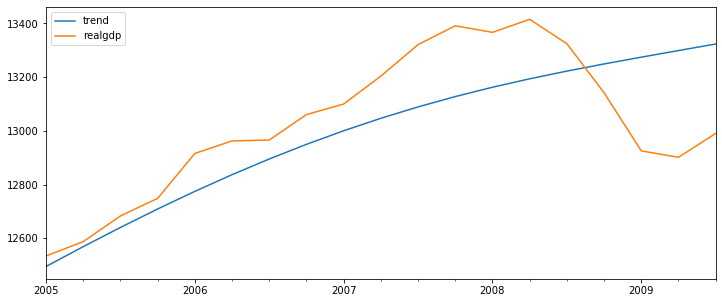

In [82]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

In [83]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [84]:
airline = airline.dropna()

In [85]:
airline

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121
...                             ...
1960-08-01                      606
1960-09-01                      508
1960-10-01                      461
1960-11-01                      390
1960-12-01                      432

[144 rows x 1 columns]

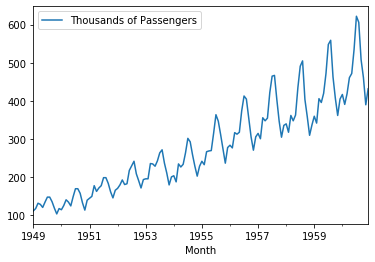

In [86]:
airline.plot()

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [88]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

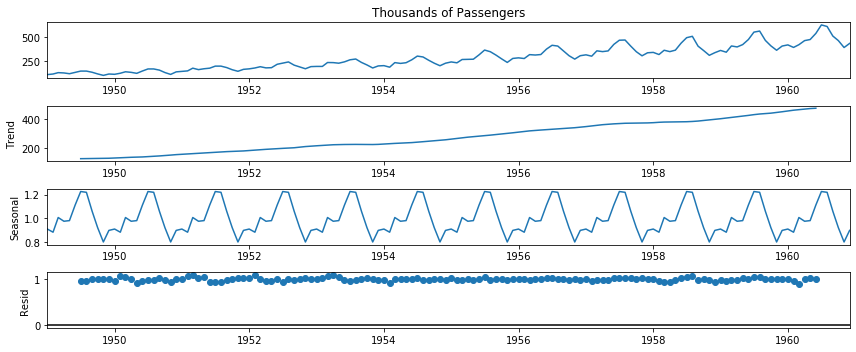

In [89]:
from pylab import rcParams
rcParams['figure.figsize']=12,5
result.plot();

In [90]:
airline = pd.read_csv('D:/Time Series/UDEMY_TSA_FINAL/Data/airline_passengers.csv',index_col='Month')

In [91]:
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [92]:
airline.dropna(inplace=True)

In [93]:
airline.index = pd.to_datetime(airline.index)

In [94]:
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [95]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [96]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

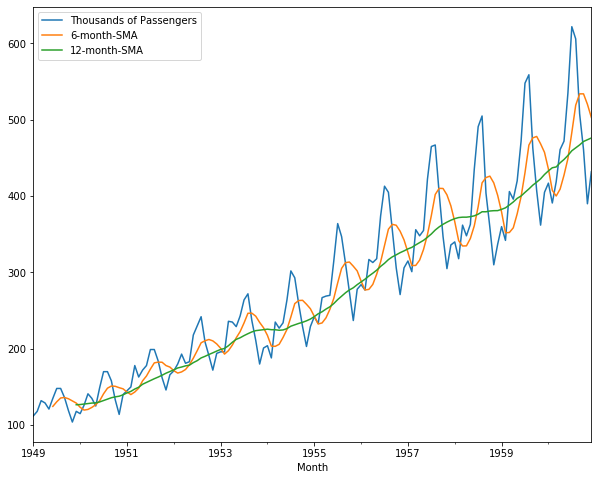

In [97]:
airline.plot(figsize=(10,8))

In [98]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

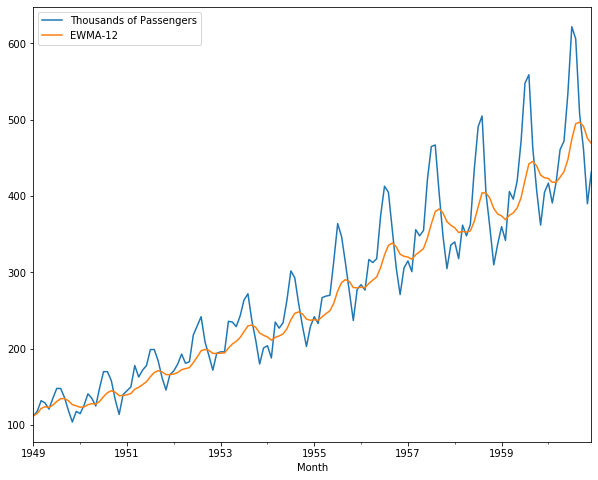

In [99]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(10,8))

In [100]:
df = pd.read_csv('airline_passengers.csv',index_col=0,parse_dates=True)

In [101]:
df = df.dropna()

In [102]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [103]:
df.index.freq = "MS";

In [104]:
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [105]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [106]:
span = 12
alpha = 2/(span+1)

In [107]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [108]:
df.head()

Thousands of Passengers     EWMA-12
Month                                          
1949-01-01                      112  112.000000
1949-02-01                      118  112.923077
1949-03-01                      132  115.857988
1949-04-01                      129  117.879836
1949-05-01                      121  118.359861

In [109]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [110]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [111]:
df['SES-12'] = fitted_model.fittedvalues.shift(-1)

In [112]:
df.head()

Thousands of Passengers     EWMA-12      SES-12
Month                                                      
1949-01-01                      112  112.000000  112.000000
1949-02-01                      118  112.923077  112.923077
1949-03-01                      132  115.857988  115.857988
1949-04-01                      129  117.879836  117.879836
1949-05-01                      121  118.359861  118.359861

In [113]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [114]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [115]:
df.head()

Thousands of Passengers     EWMA-12      SES-12  DES_add_12
Month                                                                  
1949-01-01                      112  112.000000  112.000000  114.237772
1949-02-01                      118  112.923077  112.923077  120.237772
1949-03-01                      132  115.857988  115.857988  134.237772
1949-04-01                      129  117.879836  117.879836  131.237772
1949-05-01                      121  118.359861  118.359861  123.237772

In [116]:
df.columns

Index(['Thousands of Passengers', 'EWMA-12', 'SES-12', 'DES_add_12'], dtype='object')

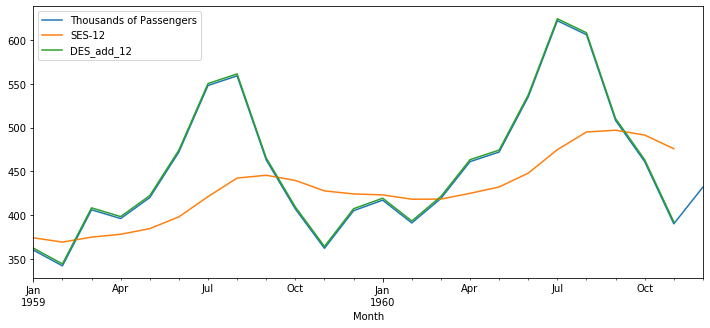

In [117]:
df[['Thousands of Passengers', 'SES-12', 'DES_add_12']].iloc[-24:].plot(figsize=(12,5))

In [118]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [119]:
df.head()

Thousands of Passengers     EWMA-12      SES-12  DES_add_12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  114.237772   
1949-02-01                      118  112.923077  112.923077  120.237772   
1949-03-01                      132  115.857988  115.857988  134.237772   
1949-04-01                      129  117.879836  117.879836  131.237772   
1949-05-01                      121  118.359861  118.359861  123.237772   

            DES_mul_12  
Month                   
1949-01-01  112.049247  
1949-02-01  118.051885  
1949-03-01  132.058041  
1949-04-01  129.056722  
1949-05-01  121.053204

In [120]:
df.columns

Index(['Thousands of Passengers', 'EWMA-12', 'SES-12', 'DES_add_12',
       'DES_mul_12'],
      dtype='object')

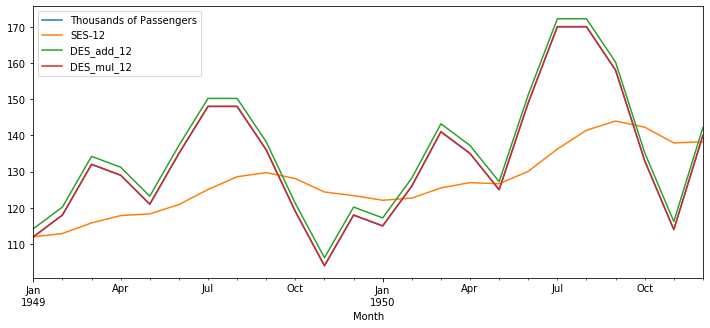

In [121]:
df[['Thousands of Passengers', 'SES-12', 'DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(12,5))

In [122]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


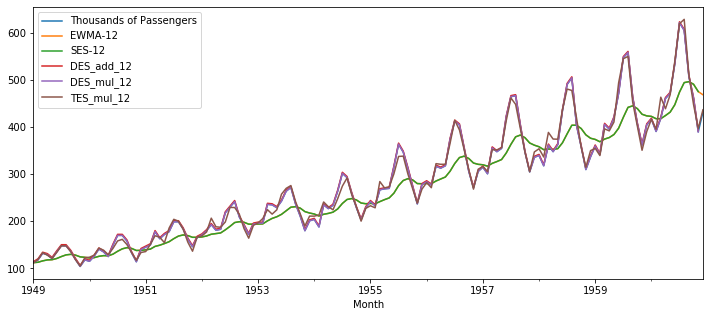

In [123]:
df.plot()

In [124]:
df.columns

Index(['Thousands of Passengers', 'EWMA-12', 'SES-12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

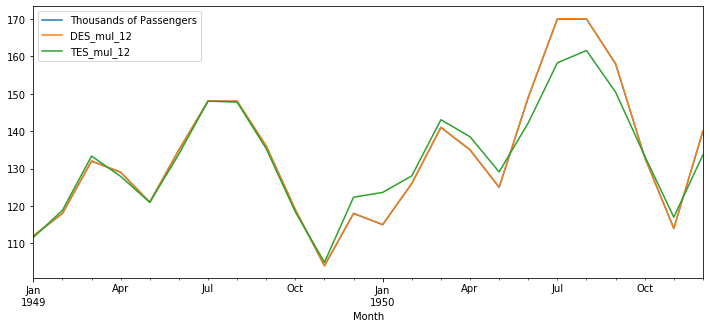

In [125]:
df[['Thousands of Passengers','DES_mul_12','TES_mul_12' ]].iloc[:24].plot(figsize=(12,5))

In [126]:
df = pd.read_csv('EnergyProduction.csv',index_col=0,parse_dates=True)

In [127]:
df.head()

EnergyIndex
DATE                   
1970-01-01      43.0869
1970-02-01      42.5577
1970-03-01      41.6215
1970-04-01      40.1982
1970-05-01      39.9321

In [128]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [129]:
df.index.freq = 'MS'

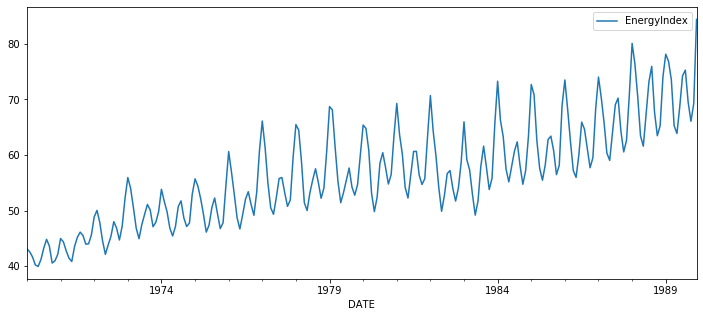

In [130]:
df.plot()

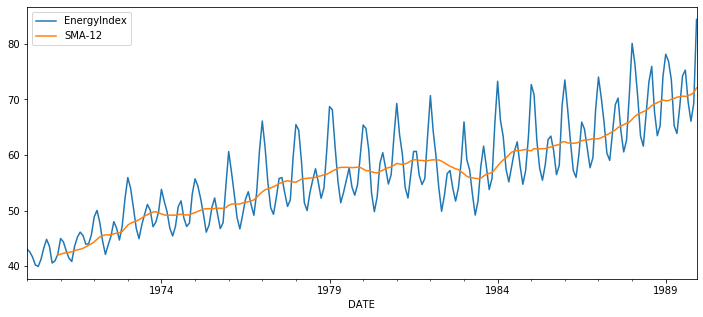

In [131]:
df['SMA-12'] = df['EnergyIndex'].rolling(12).mean()
df.plot()

In [132]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

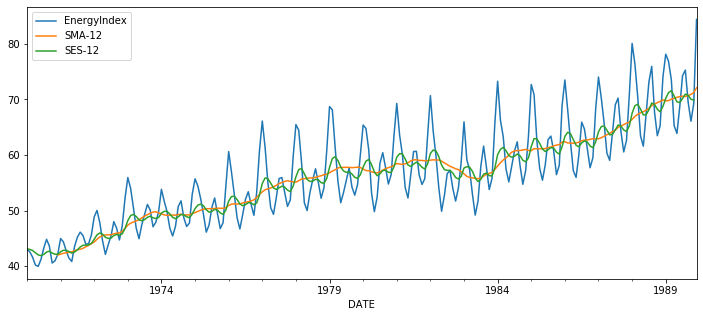

In [133]:
df['SES-12'] = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)
df.plot()

In [134]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


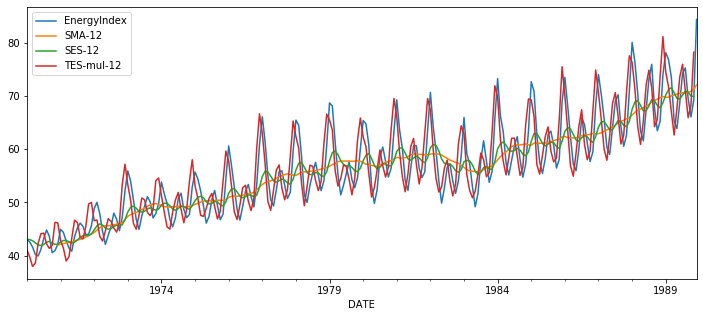

In [135]:
df['TES-mul-12'] = ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
df.plot()

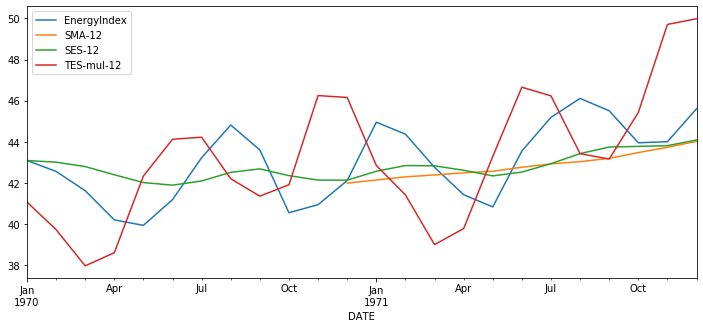

In [136]:
df[:'1971-12-01'].plot()

In [137]:
import pandas as pd
from fbprophet import Prophet 

In [138]:
df = pd.read_csv('BeerWineLiquor.csv')

In [139]:
df.head()

date  beer
0  1/1/1992  1509
1  2/1/1992  1541
2  3/1/1992  1597
3  4/1/1992  1675
4  5/1/1992  1822

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [141]:
df.columns = ['ds', 'y']

In [142]:
df.head()

ds     y
0  1/1/1992  1509
1  2/1/1992  1541
2  3/1/1992  1597
3  4/1/1992  1675
4  5/1/1992  1822

In [143]:
df['ds'] = pd.to_datetime(df['ds'])

In [144]:
df.head()

ds     y
0 1992-01-01  1509
1 1992-02-01  1541
2 1992-03-01  1597
3 1992-04-01  1675
4 1992-05-01  1822

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [146]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [147]:
future = m.make_future_dataframe(periods=24, freq='MS')

In [148]:
future.head()

ds
0 1992-01-01
1 1992-02-01
2 1992-03-01
3 1992-04-01
4 1992-05-01

In [149]:
future.tail()

ds
343 2020-08-01
344 2020-09-01
345 2020-10-01
346 2020-11-01
347 2020-12-01

In [150]:
df.tail()

ds     y
319 2018-08-01  4898
320 2018-09-01  4598
321 2018-10-01  4737
322 2018-11-01  5130
323 2018-12-01  6370

In [151]:
len(df)

324

In [152]:
len(future)

348

In [153]:
forecast = m.predict(future)

In [154]:
forecast.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 1992-01-01  1778.389678  1165.678142  1477.754869  1778.389678  1778.389678   
1 1992-02-01  1780.987184  1187.092567  1510.792791  1780.987184  1780.987184   
2 1992-03-01  1783.417109  1430.521687  1759.171456  1783.417109  1783.417109   
3 1992-04-01  1786.014616  1436.549328  1749.180568  1786.014616  1786.014616   
4 1992-05-01  1788.528331  1682.692525  2002.538797  1788.528331  1788.528331   

   additive_terms  additive_terms_lower  additive_terms_upper      yearly  \
0     -461.901459           -461.901459           -461.901459 -461.901459   
1     -427.924955           -427.924955           -427.924955 -427.924955   
2     -179.677739           -179.677739           -179.677739 -179.677739   
3     -196.091481           -196.091481           -196.091481 -196.091481   
4       45.713009             45.713009             45.713009   45.713009   

   yearly_lower  yearly_upper  multiplicative_terms  \
0   -461.901459   -461.901459                   0.0   
1   -427.924955   -427.924955                   0.0   
2   -179.677739   -179.677739                   0.0   
3   -196.091481   -196.091481                   0.0   
4     45.713009     45.713009                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  1316.488218  
1                         0.0                         0.0  1353.062229  
2                         0.0                         0.0  1603.739371  
3                         0.0                         0.0  1589.923135  
4                         0.0                         0.0  1834.241340

In [155]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [156]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail()

ds   yhat_lower   yhat_upper         yhat
343 2020-08-01  5086.019816  5413.994545  5245.685462
344 2020-09-01  4913.633928  5244.208889  5088.565168
345 2020-10-01  5041.646443  5358.867419  5193.429163
346 2020-11-01  5180.511985  5511.785642  5340.101820
347 2020-12-01  6184.581029  6514.442430  6340.094626

(735234.0, 737791.0)

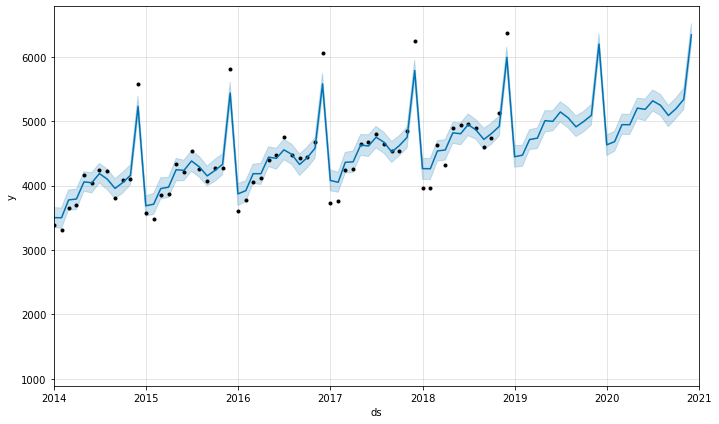

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
m.plot(forecast);
plt.xlim('2014-01-01','2021-01-01')

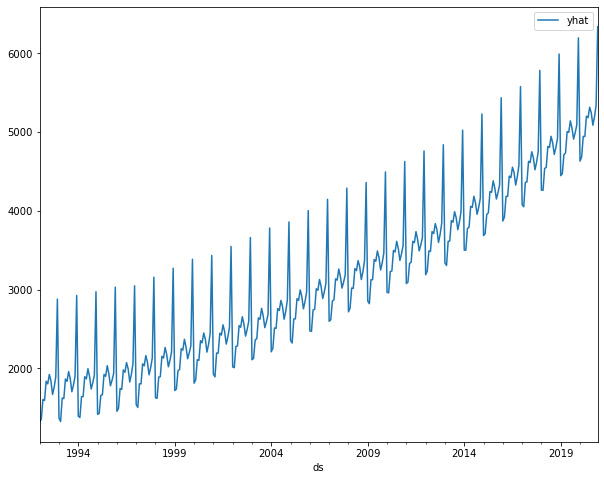

In [158]:
forecast.plot(x='ds', y='yhat',figsize=(10,8))

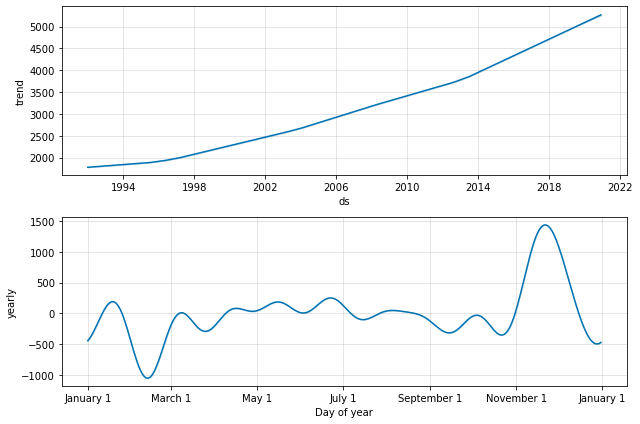

In [159]:
m.plot_components(forecast);

In [160]:
df = pd.read_csv('Miles_Traveled.csv')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [162]:
df.head()

DATE  TRFVOLUSM227NFWA
0  1970-01-01           80173.0
1  1970-02-01           77442.0
2  1970-03-01           90223.0
3  1970-04-01           89956.0
4  1970-05-01           97972.0

In [163]:
df.columns = ['ds', 'y']

In [164]:
df['ds'] = pd.to_datetime(df['ds'])

In [165]:
df.head()

ds        y
0 1970-01-01  80173.0
1 1970-02-01  77442.0
2 1970-03-01  90223.0
3 1970-04-01  89956.0
4 1970-05-01  97972.0

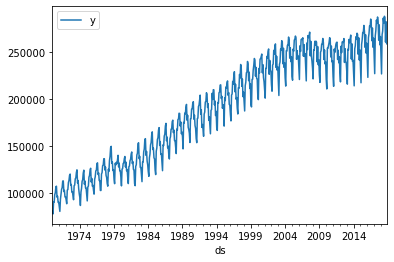

In [166]:
df.plot(x='ds', y='y')

In [167]:
len(df)

588

In [168]:
train = df.iloc[:576]

In [169]:
test = df.iloc[576:]

In [170]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [171]:
forecast.tail()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
583 2018-08-01  263219.378669  273899.024291  285295.837647  263144.881978   
584 2018-09-01  263357.665883  255371.824286  267637.270893  263240.978136   
585 2018-10-01  263491.492218  263173.134859  274482.410270  263351.393254   
586 2018-11-01  263629.779432  249754.713933  261587.771775  263454.064921   
587 2018-12-01  263763.605767  250963.292479  262602.567313  263543.325083   

       trend_upper  additive_terms  additive_terms_lower  \
583  263273.782598    16451.125033          16451.125033   
584  263443.126150    -1666.545411          -1666.545411   
585  263608.799436     5310.587893           5310.587893   
586  263783.511522    -8203.436940          -8203.436940   
587  263956.483343    -6916.514689          -6916.514689   

     additive_terms_upper        yearly  yearly_lower  yearly_upper  \
583          16451.125033  16451.125033  16451.125033  16451.125033   
584          -1666.545411  -1666.545411  -1666.545411  -1666.545411   
585           5310.587893   5310.587893   5310.587893   5310.587893   
586          -8203.436940  -8203.436940  -8203.436940  -8203.436940   
587          -6916.514689  -6916.514689  -6916.514689  -6916.514689   

     multiplicative_terms  multiplicative_terms_lower  \
583                   0.0                         0.0   
584                   0.0                         0.0   
585                   0.0                         0.0   
586                   0.0                         0.0   
587                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
583                         0.0  279670.503702  
584                         0.0  261691.120472  
585                         0.0  268802.080112  
586                         0.0  255426.342492  
587                         0.0  256847.091078

In [172]:
df.tail()

ds         y
583 2018-08-01  286608.0
584 2018-09-01  260595.0
585 2018-10-01  282174.0
586 2018-11-01  258590.0
587 2018-12-01  268413.0

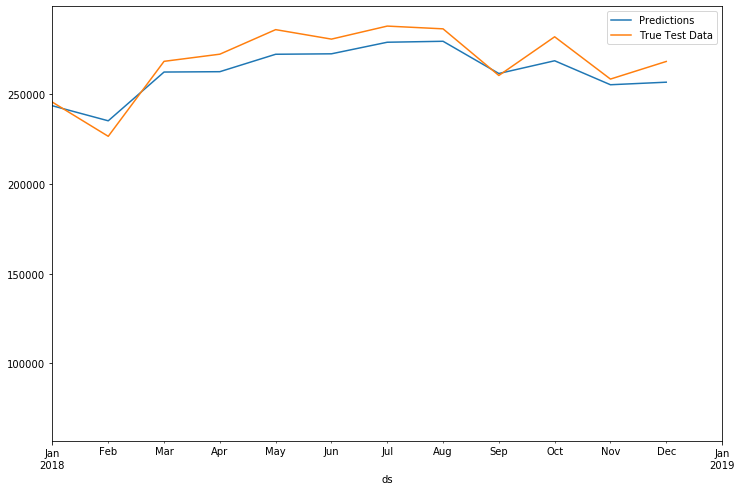

In [173]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [174]:
from statsmodels.tools.eval_measures import rmse

In [175]:
predictions = forecast.iloc[-12:]['yhat']

In [176]:
predictions

576    243683.663737
577    235311.776917
578    262511.200772
579    262708.863987
580    272429.495856
581    272679.913346
582    279136.474721
583    279670.503702
584    261691.120472
585    268802.080112
586    255426.342492
587    256847.091078
Name: yhat, dtype: float64

In [177]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [178]:
rmse(predictions,test['y'])

8750.25052083061

In [179]:
test.mean()

y    268739.666667
dtype: float64

In [180]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [181]:
initial = 5*365
initial = str(initial) + ' days'

In [182]:
pd.Timedelta

pandas._libs.tslibs.timedeltas.Timedelta

In [183]:
initial

'1825 days'

In [184]:
period = 5*365
period = str(period) + ' days'

In [185]:
period

'1825 days'

In [186]:
horizon = 5*365
horizon = str(horizon) + ' days'

In [187]:
horizon

'1825 days'

In [188]:
df_cv = cross_validation(m,initial=initial,period=period,horizon=horizon)

INFO:fbprophet:Making 8 forecasts with cutoffs between 1977-12-11 00:00:00 and 2012-12-02 00:00:00


In [189]:
df_cv.head()

ds           yhat     yhat_lower     yhat_upper         y     cutoff
0 1978-01-01  112522.809951  110957.159769  114074.029768  109838.0 1977-12-11
1 1978-02-01  108452.769081  106667.689642  110062.872890  107018.0 1977-12-11
2 1978-03-01  122874.813027  121213.761343  124595.729097  125035.0 1977-12-11
3 1978-04-01  125277.533793  123633.997679  126897.217713  122741.0 1977-12-11
4 1978-05-01  132901.370313  131279.808572  134496.852774  134427.0 1977-12-11

In [190]:
len(df_cv)

480

In [191]:
performance_metrics(df_cv)

horizon           mse          rmse           mae      mape     mdape  \
0    181 days  2.679779e+07   5176.657846   4131.264788  0.021376  0.019156   
1    202 days  2.768886e+07   5262.020141   4222.615018  0.021861  0.019156   
2    203 days  2.896985e+07   5382.364867   4354.403451  0.022630  0.019521   
3    205 days  2.955813e+07   5436.739243   4460.448958  0.023198  0.020249   
4    206 days  2.940125e+07   5422.291773   4431.505950  0.022985  0.019937   
..        ...           ...           ...           ...       ...       ...   
428 1820 days  2.495273e+08  15796.431863  12859.238328  0.061078  0.063757   
429 1821 days  2.495399e+08  15796.831146  12862.438606  0.061101  0.063757   
430 1822 days  2.558597e+08  15995.615720  13089.908477  0.062117  0.067255   
431 1824 days  2.644071e+08  16260.600452  13249.652656  0.062952  0.067255   
432 1825 days  2.669802e+08  16339.530098  13302.051548  0.063240  0.067255   

     coverage  
0    0.500000  
1    0.500000  
2    0.479167  
3    0.458333  
4    0.458333  
..        ...  
428  0.395833  
429  0.395833  
430  0.395833  
431  0.395833  
432  0.395833  

[433 rows x 7 columns]

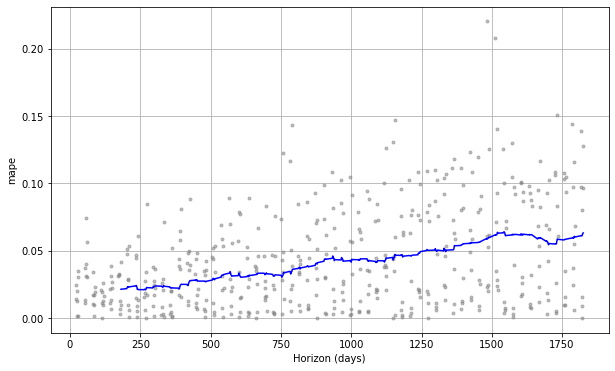

In [192]:
plot_cross_validation_metric(df_cv,metric='mape');

In [193]:
import pandas as pd
df = pd.read_csv('HospitalityEmployees.csv')
df.head()

Date  Employees
0  1/1/1990     1064.5
1  2/1/1990     1074.5
2  3/1/1990     1090.0
3  4/1/1990     1097.4
4  5/1/1990     1108.7

In [194]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

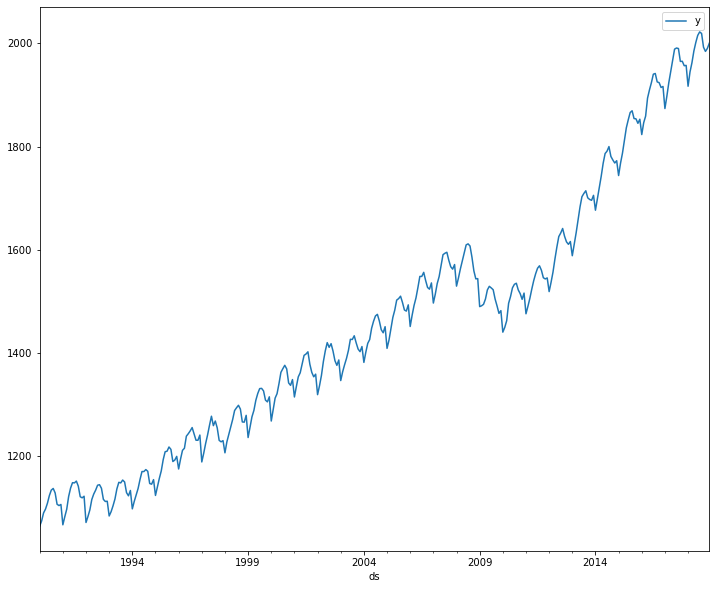

In [195]:
df.plot(x='ds',y='y',figsize=(12,10))

In [196]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12,freq='MS')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


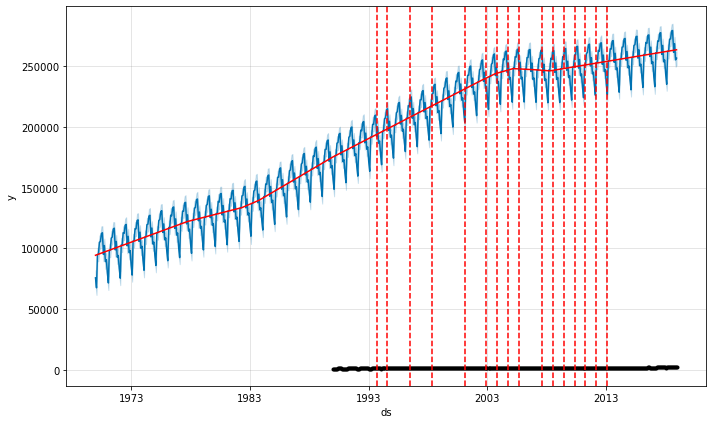

In [197]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

In [198]:
import pandas as pd
df = pd.read_csv('airline_passengers.csv')
df.head()

Month  Thousands of Passengers
0  1949-01                      112
1  1949-02                      118
2  1949-03                      132
3  1949-04                      129
4  1949-05                      121

In [199]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


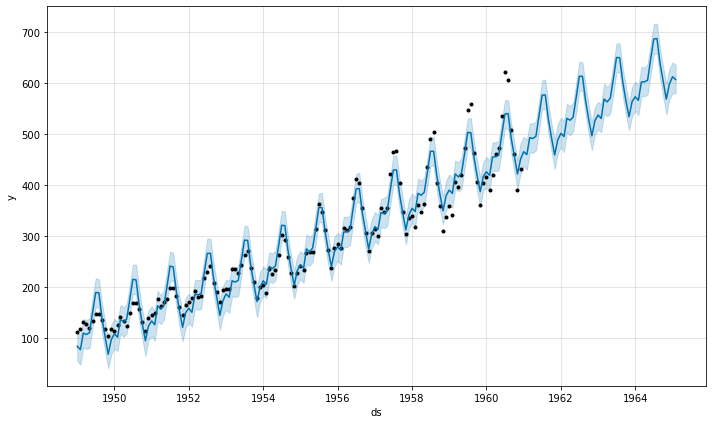

In [200]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

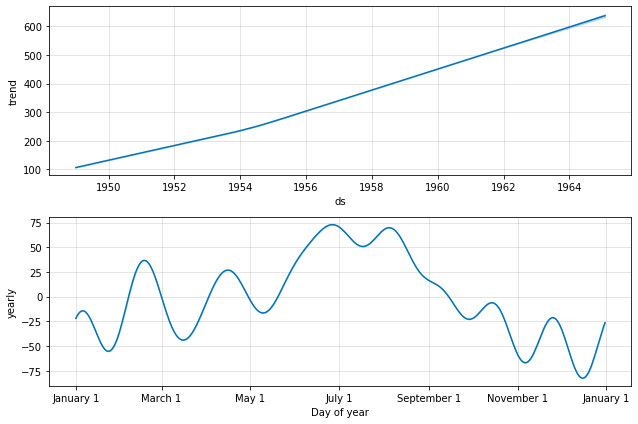

In [201]:
fig = m.plot_components(forecast);

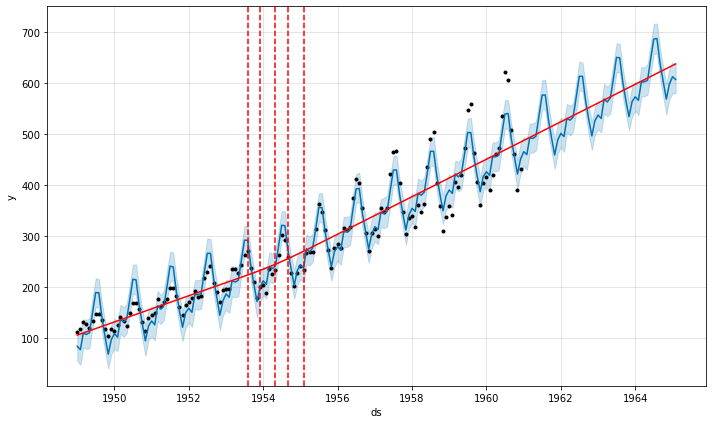

In [202]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


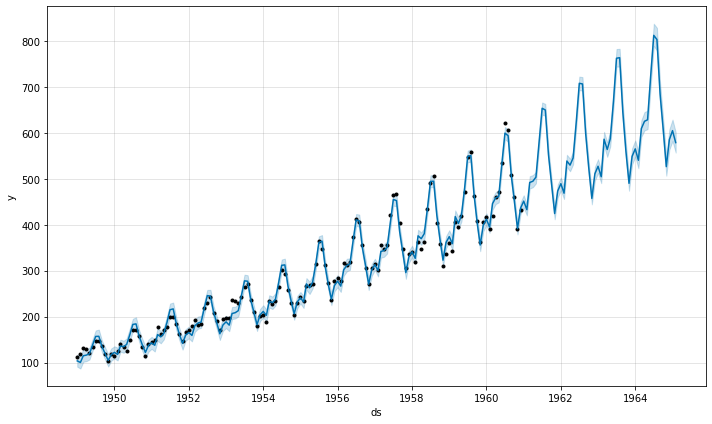

In [203]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

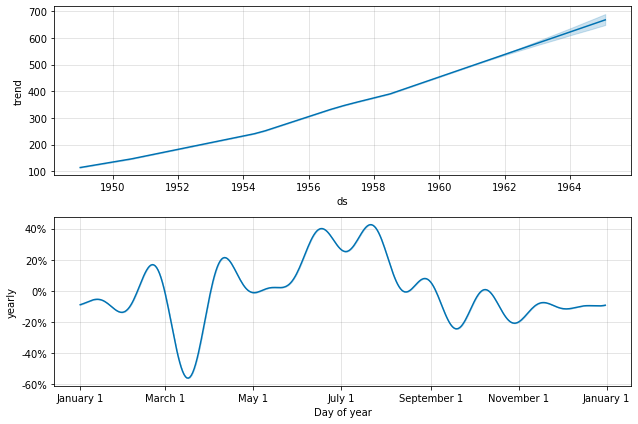

In [204]:
fig = m.plot_components(forecast);

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [206]:
df.index.freq = 'MS'

In [207]:
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [208]:
df.tail()

Thousands of Passengers
Month                              
1960-08-01                      606
1960-09-01                      508
1960-10-01                      461
1960-11-01                      390
1960-12-01                      432

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [210]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [211]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [212]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], 
                                   trend = 'mul',
                                   seasonal = 'mul',
                                   seasonal_periods = 12).fit()

C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [213]:
test_predictions = fitted_model.forecast(36)

In [214]:
test_predictions

1958-02-01    339.137622
1958-03-01    399.272453
1958-04-01    394.220606
1958-05-01    402.536027
1958-06-01    473.133366
1958-07-01    521.802945
1958-08-01    514.531957
1958-09-01    446.226218
1958-10-01    385.432456
1958-11-01    339.645779
1958-12-01    381.448514
1959-01-01    401.209020
1959-02-01    387.152183
1959-03-01    455.800806
1959-04-01    450.033726
1959-05-01    459.526432
1959-06-01    540.118829
1959-07-01    595.678969
1959-08-01    587.378566
1959-09-01    509.402210
1959-10-01    440.001365
1959-11-01    387.732284
1959-12-01    435.453383
1960-01-01    458.011549
1960-02-01    441.964567
1960-03-01    520.332353
1960-04-01    513.748779
1960-05-01    524.585447
1960-06-01    616.587986
1960-07-01    680.014242
1960-08-01    670.538680
1960-09-01    581.522557
1960-10-01    502.296052
1960-11-01    442.626798
1960-12-01    497.104174
1961-01-01    522.856089
Freq: MS, dtype: float64

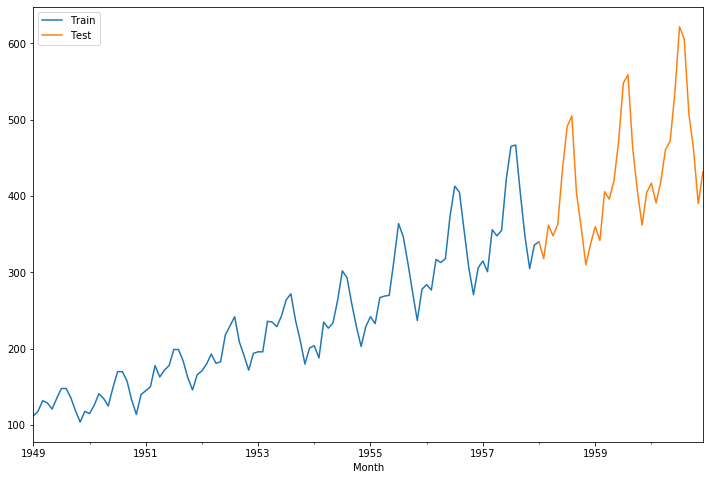

In [215]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test')

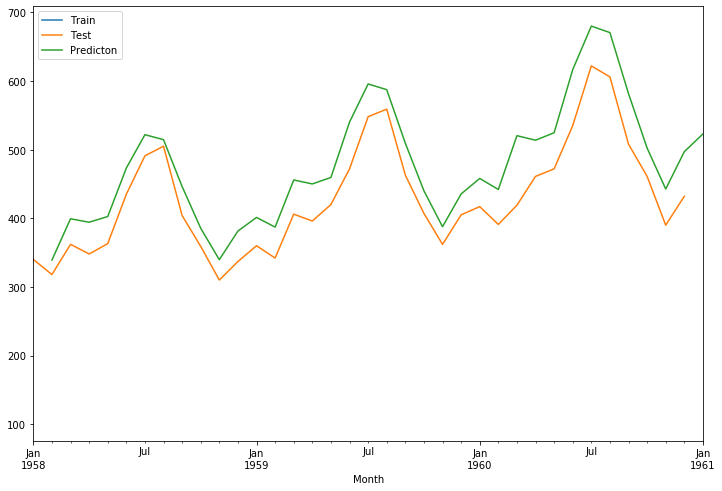

In [216]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Predicton',xlim=['1958-01-01','1961-01-01'])

In [217]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [218]:
mean_absolute_error(test_data,test_predictions)

63.0282862810754

In [219]:
test_data.describe()

Thousands of Passengers
count                36.000000
mean                428.500000
std                  79.329152
min                 310.000000
25%                 362.000000
50%                 412.000000
75%                 472.000000
max                 622.000000

In [220]:
mean_squared_error(test_data,test_predictions)

5613.837862455122

In [221]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92554879648945

In [222]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [223]:
forecast_predictions = final_model.forecast(36)

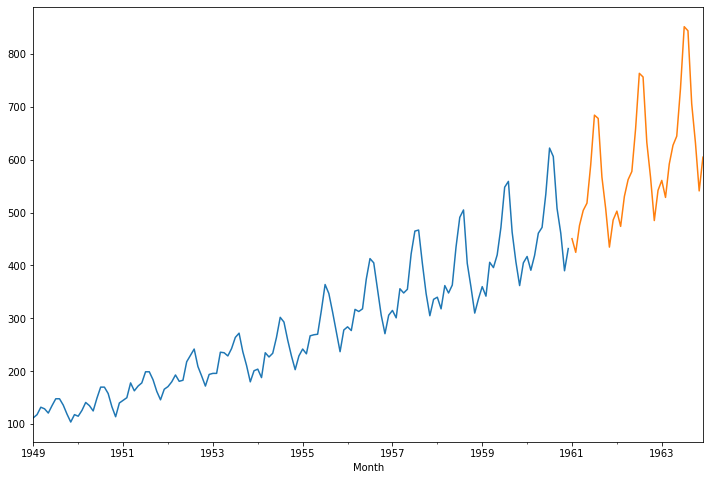

In [224]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [225]:
df2 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)

In [226]:
df2.head()

a   b  c   d
1950-01-01  36  27  0  67
1950-02-01  58  22  3  31
1950-03-01  61  17  5  67
1950-04-01  37  15  8  47
1950-05-01  66  13  8  62

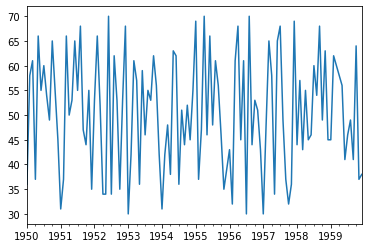

In [227]:
df2['a'].plot()

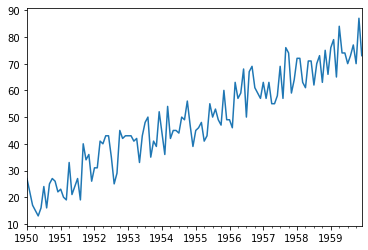

In [228]:
df2['b'].plot()

In [229]:
from statsmodels.tsa.statespace.tools import diff

In [230]:
#df2['b'] - df2['b'].shift(1)

In [231]:
diff(df2['b'],k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
import statsmodels.api as sm

In [234]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [235]:
df1 = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

In [236]:
df2 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [237]:
df1.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [238]:
df2.head()

Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44

In [239]:
import warnings
warnings.filterwarnings('ignore')

In [240]:
 df = pd.DataFrame({'a':[13,5,11,12,9]})

In [241]:
df

a
0  13
1   5
2  11
3  12
4   9

In [242]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [243]:
pacf_yw(df['a'],nlags=4,method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [244]:
pacf_ols(df['a'],nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [245]:
from pandas.plotting import lag_plot

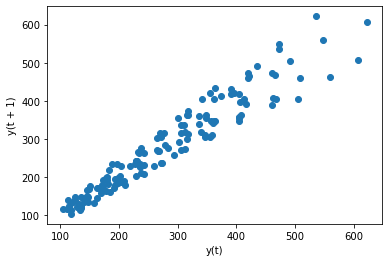

In [246]:
lag_plot(df1['Thousands of Passengers'])

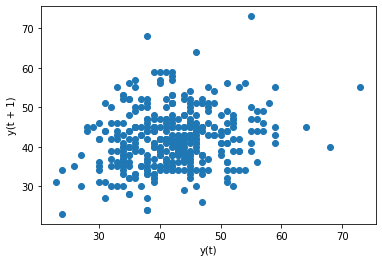

In [247]:
lag_plot(df2['Births'])

In [248]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

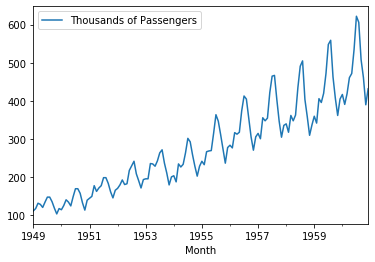

In [249]:
df1.plot()

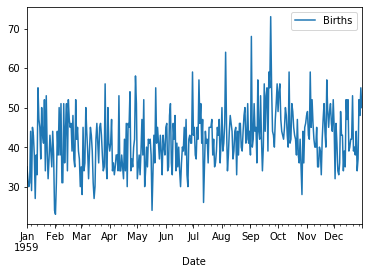

In [250]:
df2.plot()

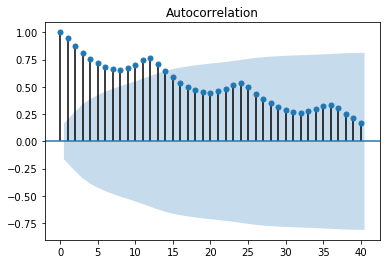

In [251]:
plot_acf(df1,lags=40);

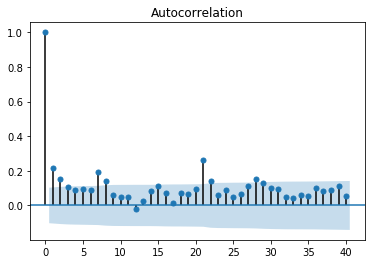

In [252]:
plot_acf(df2,lags=40);

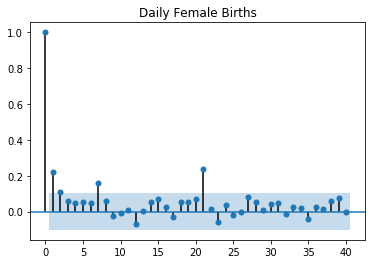

In [253]:
plot_pacf(df2,lags=40,title='Daily Female Births');

In [254]:
from statsmodels.tsa.ar_model import AR, ARResults

In [255]:
df = pd.read_csv('uspopulation.csv',index_col='DATE',parse_dates=True)

In [256]:
df.index.freq = 'MS'

In [257]:
df.head()

PopEst
DATE              
2011-01-01  311037
2011-02-01  311189
2011-03-01  311351
2011-04-01  311522
2011-05-01  311699

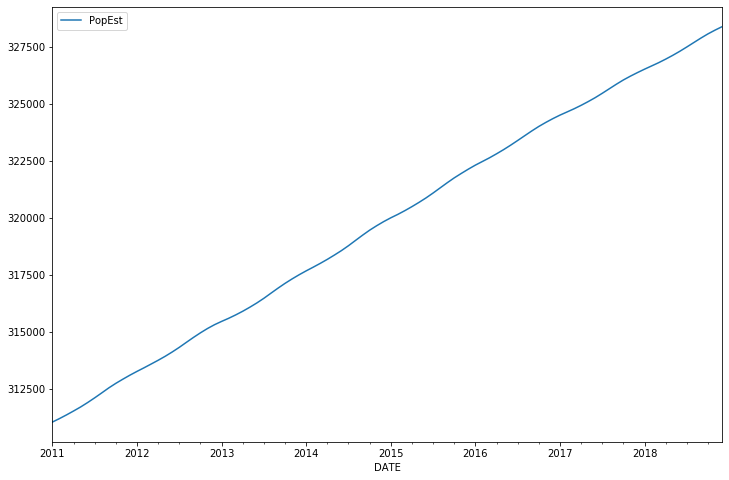

In [258]:
df.plot(figsize=(12,8))

In [259]:
len(df)

96

In [260]:
train = df.iloc[:84]

In [261]:
test = df.iloc[84:]

In [262]:
import warnings
warnings.filterwarnings = 'ignore'

In [263]:
model = AR(train['PopEst'])

In [264]:
AR1fit = model.fit(maxlag=1)

In [265]:
AR1fit.k_ar

1

In [266]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [267]:
start = len(train)

In [268]:
end = len(train) + len(test) - 1

In [269]:
AR1fit.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [270]:
predictions1 = AR1fit.predict(start=start,end=end)

In [271]:
predictions1 = predictions1.rename('AR(1) Predictions')

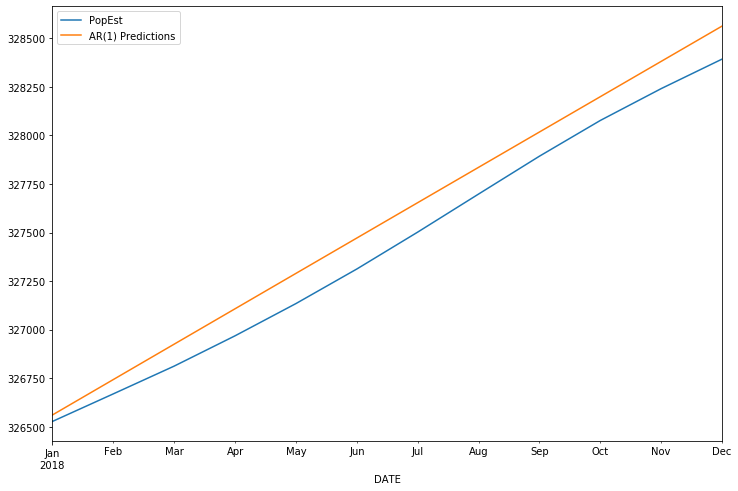

In [272]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)

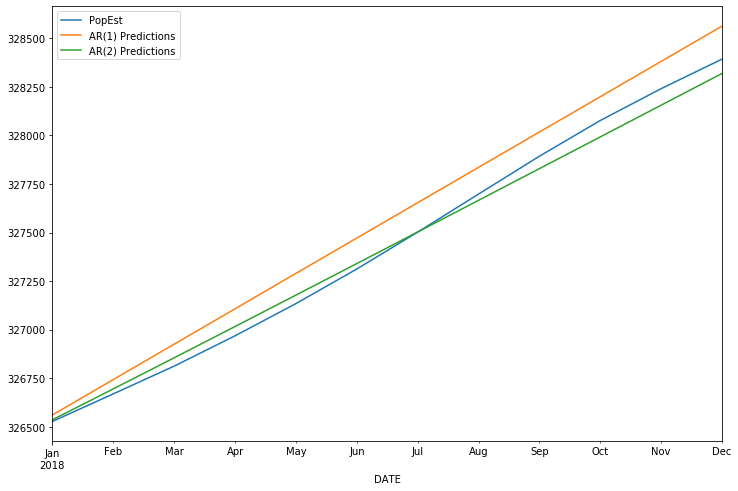

In [285]:
model2 = AR(train['PopEst'])
ARfit2 = model2.fit(maxlag=2)
ARfit2.params
predictions2 = ARfit2.predict(start=start,end=end)
predictions2 = predictions2.rename('AR(2) Predictions')
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [ ]:
model3 = AR(train['PopEst'])
ARfit2 = model3.fit(ic='t-stat')

In [287]:
ARfit2.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [290]:
predictions8 = ARfit2.predict(start=start, end=end)
predictions8 = predictions8.rename('AR(8) Predictions')
predictions8

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944948
2018-05-01    327177.719499
2018-06-01    327340.045896
2018-07-01    327502.787331
2018-08-01    327665.826847
2018-09-01    327829.064480
2018-10-01    327992.414809
2018-11-01    328155.804859
2018-12-01    328319.172308
Freq: MS, Name: AR(8) Predictions, dtype: float64

In [291]:
from sklearn.metrics import mean_squared_error

In [292]:
labels = ['AR1','AR2','AR8']

In [293]:
preds = [predictions1, predictions2,predictions8]

In [294]:
for i in range(3):
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} MSE was: {error}')

AR1 MSE was: 17449.714239577344
AR2 MSE was: 2713.258615675103
AR8 MSE was: 2713.258615675103


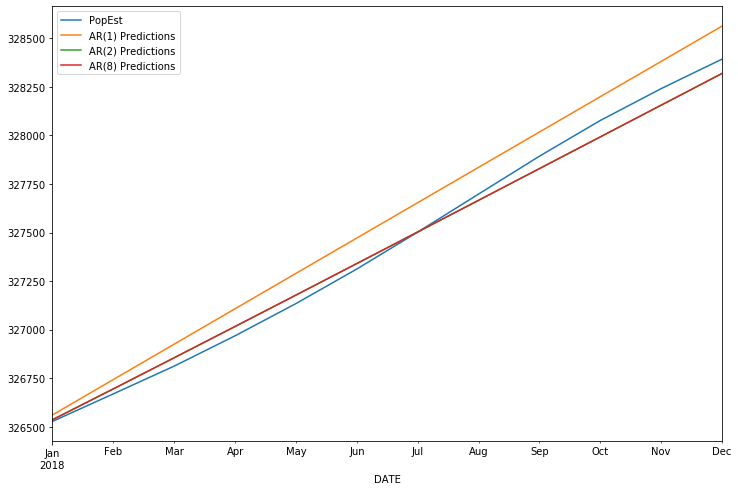

In [295]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

In [296]:
model = AR(df['PopEst'])
ARfit = model.fit()
forecasted_values = ARfit.predict(start=len(df),end=len(df)+12).rename('forecast')

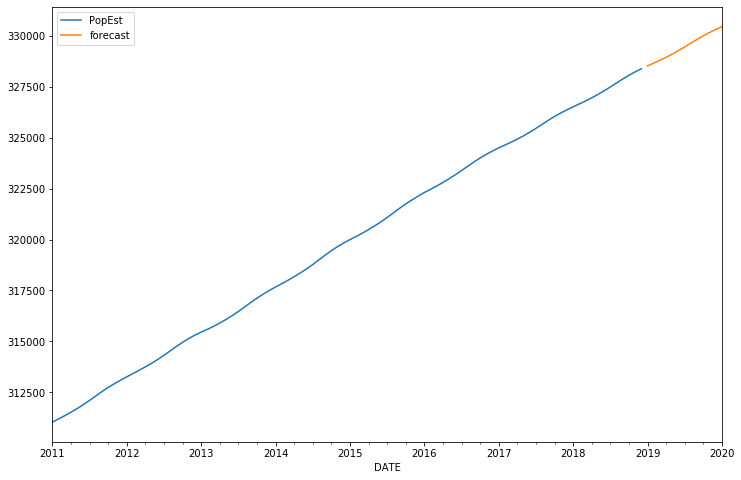

In [297]:
df['PopEst'].plot(figsize=(12,8),legend=True)
forecasted_values.plot(legend=True)

In [298]:
df1 = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

In [299]:
df2 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

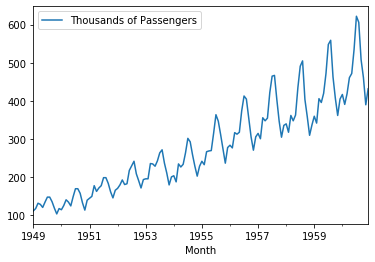

In [300]:
df1.plot()

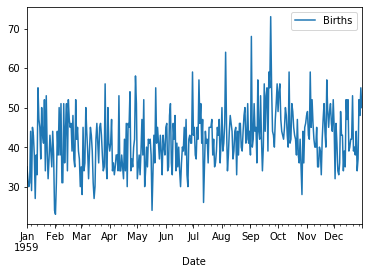

In [301]:
df2.plot()

In [302]:
from statsmodels.tsa.stattools import adfuller

In [303]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [304]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4],index=['ADF Test Statistic','p-value','# Lags Used','# Observations'])

In [305]:
for key,val in dftest[4].items():
    dfout[f' critical value ({key})'] = val


In [306]:
dfout

ADF Test Statistic         0.815369
p-value                    0.991880
# Lags Used               13.000000
# Observations           130.000000
 critical value (1%)      -3.481682
 critical value (5%)      -2.884042
 critical value (10%)     -2.578770
dtype: float64

In [307]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series,title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistic', 'p=value', '# lags used', '#observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        print(out.to_string())
        if result[1] <= 0.05:
            print('strong evidence against the null hypothesis')
            print('reject the null hypothesis')
            print('data has no unit root and is stationary ')
        else:
            print('weak evidence against the null hypothesis')
            print('fail to reject the null hypothesis')
            print('data has a unit root and is non-stationary ')

            

In [308]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic       0.815369
p=value                  0.991880
# lags used             13.000000
#observations          130.000000
critical value (1%)     -3.481682
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non-stationary 
ADF test statistic       0.815369
p=value                  0.991880
# lags used             13.000000
#observations          130.000000
critical value (1%)     -3.481682
critical value (5%)     -2.884042
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non-stationary 
ADF test statistic        0.815369
p=value                   0.991880
# lags used              13.000000
#observations           130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non

In [309]:
adf_test(df2['Births']);

Augmented Dickey-Fuller Test: 
ADF test statistic      -4.808291
p=value                  0.000052
# lags used              6.000000
#observations          358.000000
critical value (1%)     -3.448749
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 
ADF test statistic      -4.808291
p=value                  0.000052
# lags used              6.000000
#observations          358.000000
critical value (1%)     -3.448749
critical value (5%)     -2.869647
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 
ADF test statistic       -4.808291
p=value                   0.000052
# lags used               6.000000
#observations           358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 


In [310]:
df3 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)

In [311]:
df3.index.feq = 'MS'

In [312]:
df3.head()

a   b  c   d
1950-01-01  36  27  0  67
1950-02-01  58  22  3  31
1950-03-01  61  17  5  67
1950-04-01  37  15  8  47
1950-05-01  66  13  8  62

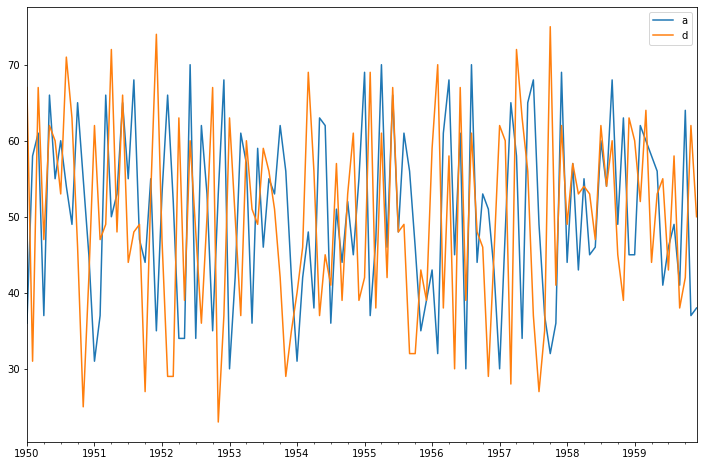

In [313]:
df3[['a','d']].plot(figsize=(12,8))

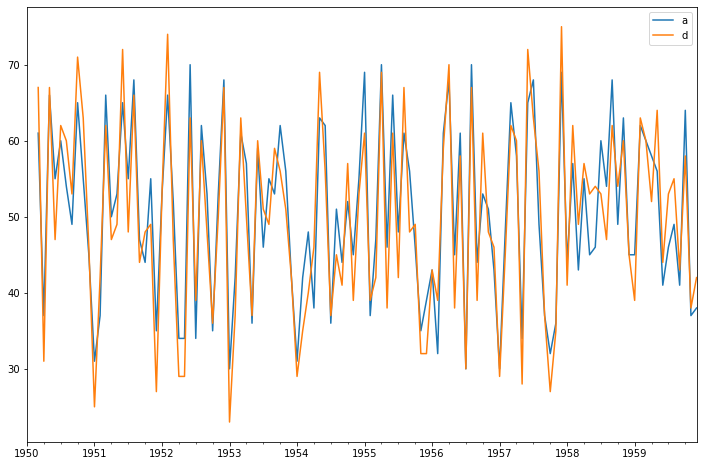

In [314]:
df3['a'].iloc[2:].plot(figsize=(12,8),legend=True)
df3['d'].shift(2).plot(legend=True)

In [315]:
from statsmodels.tsa.stattools import grangercausalitytests

In [316]:
grangercausalitytests(df3[['a','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [317]:
grangercausalitytests(df3[['b','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


In [318]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])

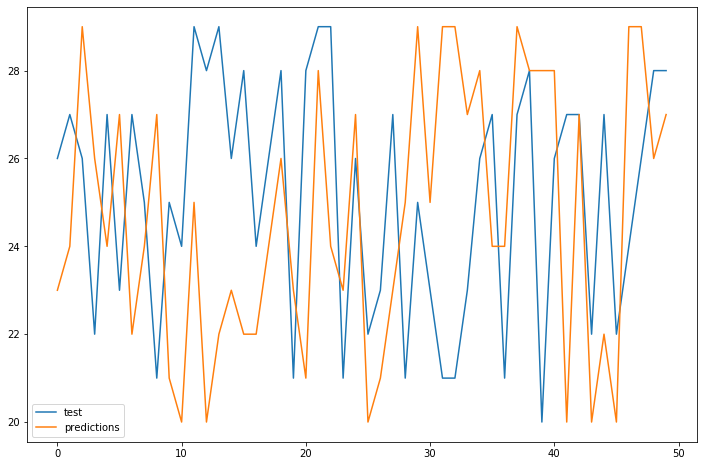

In [319]:
df.plot(figsize=(12,8))

In [320]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [321]:
mse(df['test'],df['predictions'])

17.02

In [322]:
rmse(df['test'],df['predictions'])

4.125530268947253

In [323]:
meanabs(df['test'],df['predictions'])

3.54

In [324]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [325]:
df.index.freq = 'MS'

In [326]:
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

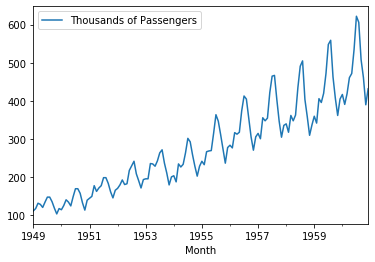

In [327]:
df.plot()

In [328]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

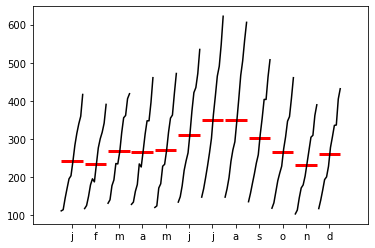

In [329]:
month_plot(df['Thousands of Passengers']);

In [330]:
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()

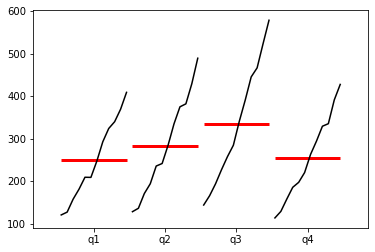

In [331]:
quarter_plot(dfq);

In [332]:
df1 = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'
df2 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [333]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy>=1.3.2 in c:\users\ankit\anaconda3\lib\site-packages (from pmdarima) (1.4.1)


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\ankit\\anaconda3\\lib\\site-packages\\~ython\\Compiler\\Scanning.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [334]:
from pmdarima import auto_arima

In [335]:
import warnings

In [336]:
warnings.filterwarnings = 'ignore'

In [337]:
stepwise_fit = auto_arima(df2['Births'],start_p=0,start_q=0,max_p=6,maz_q=3,seasonal=False,trace=True)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=2650.760, BIC=2658.555, Time=0.042 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=2565.234, BIC=2576.925, Time=0.072 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=2463.584, BIC=2475.275, Time=0.147 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=2648.768, BIC=2652.665, Time=0.010 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=2460.154, BIC=2475.743, Time=0.171 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=2461.271, BIC=2480.757, Time=0.234 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=2460.752, BIC=2480.238, Time=0.439 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=2460.722, BIC=2476.311, Time=0.170 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=2536.154, BIC

In [338]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.077
Date:                Sat, 15 Aug 2020   AIC                           2460.154
Time:                        16:45:40   BIC                           2475.743
Sample:                             0   HQIC                          2466.350
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0132      0.014      0.975      0.330      -0.013       0.040
ar.L1          0.1299      0.059      2.217      0.027       0.015       0.245
ma.L1         -0.9694      0.016    -62.235      0.000      -1.000      -0.939
sigma2        48.9989      3.432     14.279      0.000      42.273      55.725
===================================================================================
Ljung-Box (Q):                       36.69   Jarque-Bera (JB):                26.17
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.58
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [339]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'],start_p=0,start_q=0,max_p=4,maz_q=4,seasonal=True,trace=True,m=12)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=1034.075, BIC=1045.576, Time=0.325 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1033.479, BIC=1039.229, Time=0.015 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1022.316, BIC=1033.817, Time=0.213 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1022.904, BIC=1034.405, Time=0.243 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.508, BIC=1034.383, Time=0.012 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=1022.343, BIC=1030.968, Time=0.086 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=1021.137, BIC=1035.513, Time=0.652 seconds
Fit ARIMA(1,1,0)x(2,1,1,12) [intercept=True]; AIC=1017.164, BIC=1034.415, Time=2.487 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=102

In [340]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.922
Date:                            Sat, 15 Aug 2020   AIC                           1015.844
Time:                                    16:45:52   BIC                           1033.095
Sample:                                         0   HQIC                          1022.854
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.033      0.013      0.990      -0.065       0.066
ma.L1         -0.4235      0.068     -6.194      0.000      -0.558      -0.290
ar.S.L12       0.6663      0.158      4.229      0.000       0.358       0.975
ar.S.L24       0.3318      0.096      3.469      0.001       0.144       0.519
ma.S.L12      -0.9712      1.091     -0.890      0.373      -3.109       1.167
sigma2       110.8287     98.274      1.128      0.259     -81.785     303.443
===================================================================================
Ljung-Box (Q):                       53.12   Jarque-Bera (JB):                 7.55
Prob(Q):                              0.08   Prob(JB):                         0.02
Heteroskedasticity (H):               2.82   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [341]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [342]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [343]:
from pmdarima import auto_arima

In [344]:
df1 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]

In [345]:
df2 = pd.read_csv('TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'MS'

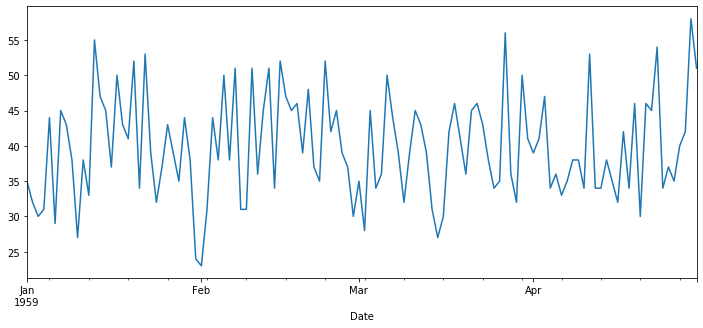

In [346]:
df1['Births'].plot(figsize=(12,5))

In [347]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series,title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistic', 'p=value', '# lags used', '#observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        print(out.to_string())
        if result[1] <= 0.05:
            print('strong evidence against the null hypothesis')
            print('reject the null hypothesis')
            print('data has no unit root and is stationary ')
        else:
            print('weak evidence against the null hypothesis')
            print('fail to reject the null hypothesis')
            print('data has a unit root and is non-stationary ')

In [348]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic    -9.855384e+00
p=value                4.373545e-17
# lags used            0.000000e+00
#observations          1.190000e+02
critical value (1%)   -3.486535e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 
ADF test statistic    -9.855384e+00
p=value                4.373545e-17
# lags used            0.000000e+00
#observations          1.190000e+02
critical value (1%)   -3.486535e+00
critical value (5%)   -2.886151e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 
ADF test statistic     -9.855384e+00
p=value                 4.373545e-17
# lags used             0.000000e+00
#observations           1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit ro

In [349]:
auto_arima(df1['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Sat, 15 Aug 2020   AIC                            823.489
Time:                        16:45:54   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [350]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [351]:
model = ARMA(train['Births'],order=(2,2))

In [352]:
results = model.fit()

In [353]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Sat, 15 Aug 2020   AIC                            627.809
Time:                        16:45:54   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [354]:
start = len(train)
end = len(train) + len(test) - 1 

In [355]:
predictions = results.predict(start,end).rename('ARMA (2,2) Predictions')

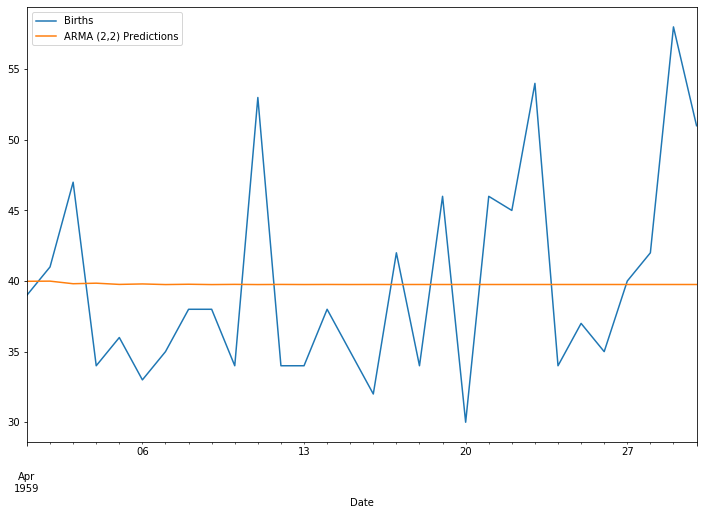

In [356]:
test['Births'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [357]:
test.mean()

Births    39.833333
dtype: float64

In [358]:
predictions.mean()

39.777430277482516

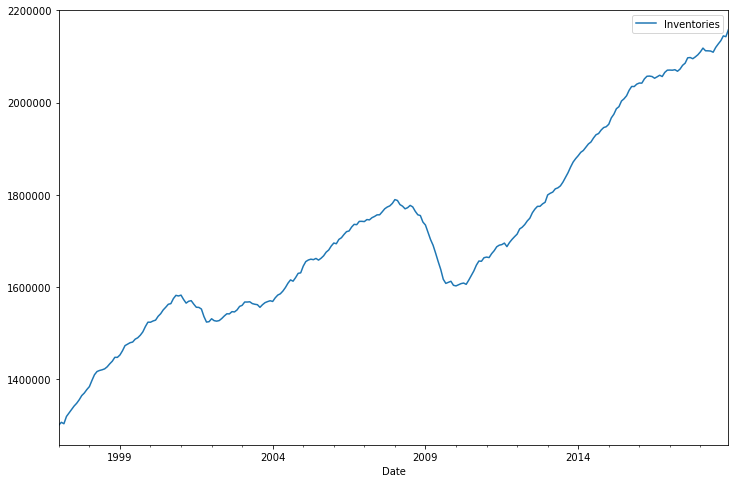

In [359]:
df2.plot(figsize=(12,8))

In [360]:
from statsmodels.tsa.seasonal import seasonal_decompose

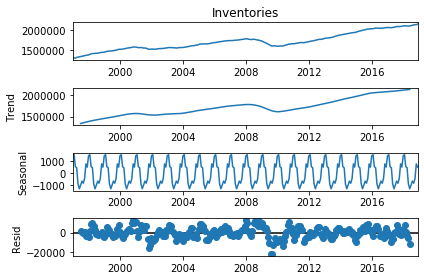

In [361]:
result = seasonal_decompose(df2['Inventories'],model='add')
result.plot();

In [362]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sat, 15 Aug 2020   AIC                           5348.037
Time:                        16:45:56   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [363]:
from statsmodels.tsa.statespace.tools import diff

In [364]:
df2['Diff_1'] = diff(df2['Inventories'],k_diff=1)

In [365]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.412249
p=value                  0.010548
# lags used              4.000000
#observations          258.000000
critical value (1%)     -3.455953
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 
ADF test statistic      -3.412249
p=value                  0.010548
# lags used              4.000000
#observations          258.000000
critical value (1%)     -3.455953
critical value (5%)     -2.872809
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 
ADF test statistic       -3.412249
p=value                   0.010548
# lags used               4.000000
#observations           258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 


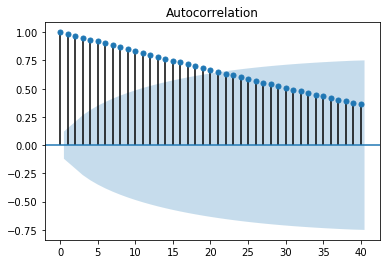

In [366]:
plot_acf(df2['Inventories'],lags=40);

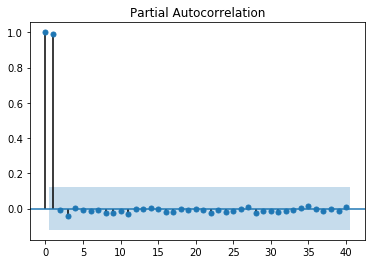

In [367]:
plot_pacf(df2['Inventories'],lags=40);

In [368]:
stepwise_fit = auto_arima(df2['Inventories'],start_p=0,start_q=0,max_p=2,max_q=2,seasonal=False,trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=5348.037, BIC=5355.181, Time=0.019 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=5399.843, BIC=5410.560, Time=0.044 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=5350.241, BIC=5360.957, Time=0.039 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=5409.217, BIC=5412.789, Time=0.008 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=5378.835, BIC=5393.124, Time=0.196 seconds
Total fit time: 0.310 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sat, 15 Aug 2020   AIC                           5348.037
Time:                        16:45:57   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [369]:
len(df2)

264

In [370]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [371]:
model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Sat, 15 Aug 2020   AIC                           4980.790
Time:                        16:45:57   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5698   1344.866      2.378      0.017     561.681    5833.459
ar.L1.D.Inventories     0.9026      0.039     23.010      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [372]:
start = len(train)
end = len(train) + len(test) - 1

In [373]:
predictions = results.predict(start=start,end=end,typ='levels').rename('ARIMA(1,1,1) Predictions')

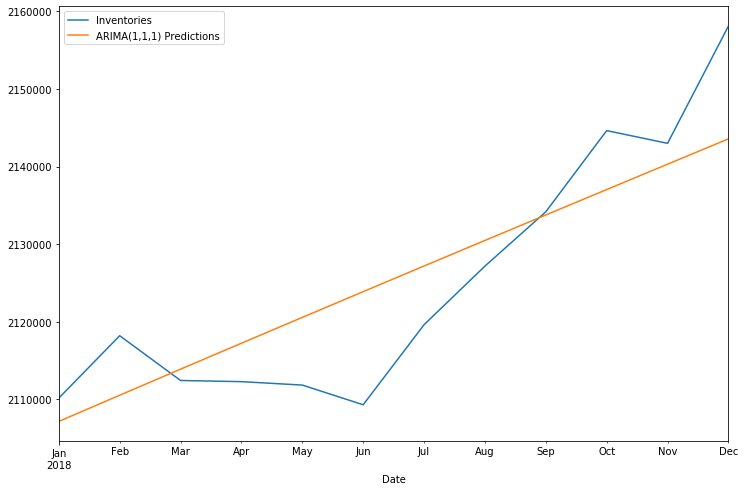

In [374]:
test['Inventories'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [375]:
from statsmodels.tools.eval_measures import rmse

In [376]:
error = rmse(test['Inventories'],predictions)

In [377]:
error

7789.597562766068

In [378]:
test['Inventories'].mean()

2125075.6666666665

In [379]:
predictions.mean()

2125465.2713944274

In [380]:
model = ARIMA(df2['Inventories'],order=(1,1,1))

In [381]:
results = model.fit()

In [382]:
fcast = results.predict(start=len(df2),end=len(df2)+11,typ='levels').rename('ARIMA (1,1,1) FORECAST')

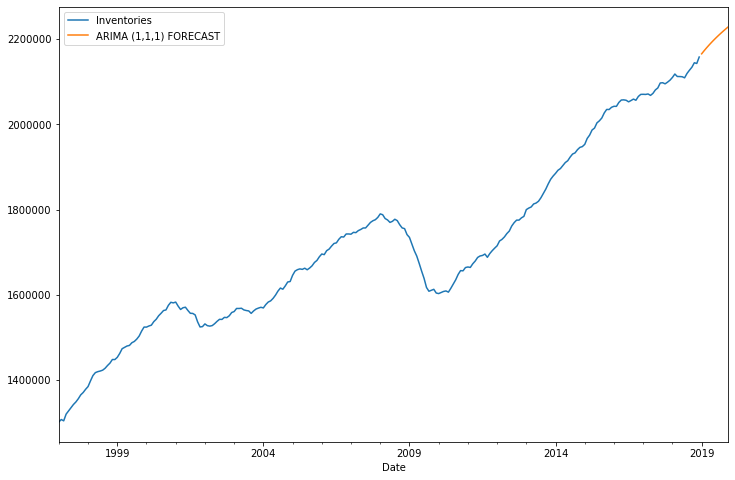

In [383]:
df2['Inventories'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)

In [384]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [385]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [390]:
from pmdarima.arima import auto_arima

In [391]:
df = pd.read_csv('D:/Time Series/UDEMY_TSA_FINAL/Data/co2_mm_mlo.csv')

In [392]:
df.head()

year  month  decimal_date  average  interpolated
0  1958      3      1958.208   315.71        315.71
1  1958      4      1958.292   317.45        317.45
2  1958      5      1958.375   317.50        317.50
3  1958      6      1958.458      NaN        317.10
4  1958      7      1958.542   315.86        315.86

In [393]:
#dict(year=df['year'],month=df['month'],day=1)
df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [394]:
df.head()

year  month  decimal_date  average  interpolated       date
0  1958      3      1958.208   315.71        315.71 1958-03-01
1  1958      4      1958.292   317.45        317.45 1958-04-01
2  1958      5      1958.375   317.50        317.50 1958-05-01
3  1958      6      1958.458      NaN        317.10 1958-06-01
4  1958      7      1958.542   315.86        315.86 1958-07-01

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [396]:
df = df.set_index('date')

In [397]:
df.head()

year  month  decimal_date  average  interpolated
date                                                        
1958-03-01  1958      3      1958.208   315.71        315.71
1958-04-01  1958      4      1958.292   317.45        317.45
1958-05-01  1958      5      1958.375   317.50        317.50
1958-06-01  1958      6      1958.458      NaN        317.10
1958-07-01  1958      7      1958.542   315.86        315.86

In [398]:
df.index.freq = 'MS'

In [399]:
df.head()

year  month  decimal_date  average  interpolated
date                                                        
1958-03-01  1958      3      1958.208   315.71        315.71
1958-04-01  1958      4      1958.292   317.45        317.45
1958-05-01  1958      5      1958.375   317.50        317.50
1958-06-01  1958      6      1958.458      NaN        317.10
1958-07-01  1958      7      1958.542   315.86        315.86

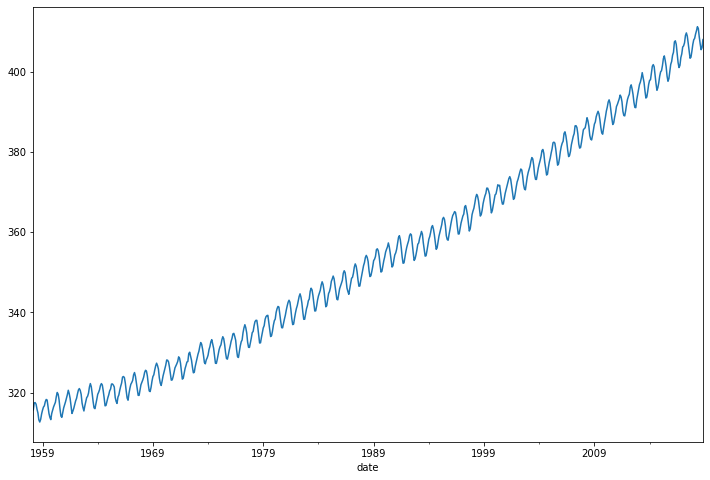

In [400]:
df['interpolated'].plot(figsize=(12,8))

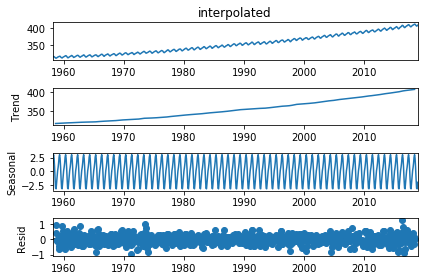

In [401]:
result = seasonal_decompose(df['interpolated'],model='add')
result.plot();

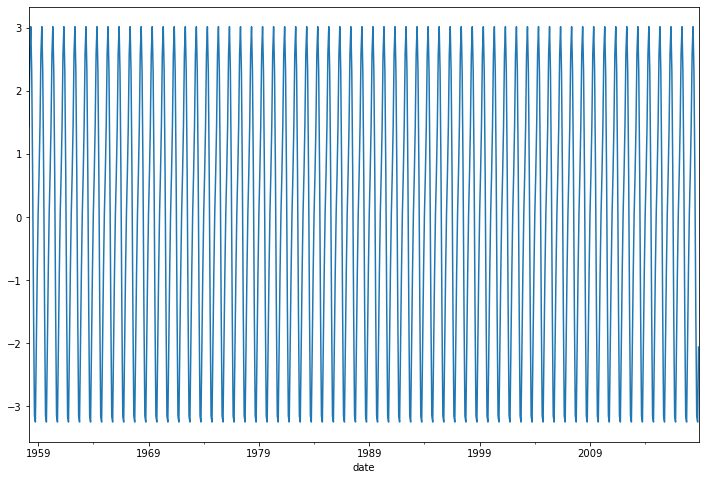

In [402]:
result.seasonal.plot(figsize=(12,8))

In [403]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -208.340
Date:                                 Sat, 15 Aug 2020   AIC                            430.680
Time:                                         16:52:45   BIC                            462.812
Sample:                                              0   HQIC                           443.078
                                                 - 729                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.612e-05      0.000      0.341      0.733      -0.000       0.001
ma.L1         -0.3742      0.033    -11.236      0.000      -0.439      -0.309
ar.S.L12       0.0318      0.018      1.749      0.080      -0.004       0.067
ar.S.L24       0.9676      0.018     52.932      0.000       0.932       1.003
ma.S.L12       0.1273      0.023      5.489      0.000       0.082       0.173
ma.S.L24      -0.8659      0.041    -21.022      0.000      -0.947      -0.785
sigma2         0.0952      0.005     17.919      0.000       0.085       0.106
===================================================================================
Ljung-Box (Q):                       50.54   Jarque-Bera (JB):                 4.27
Prob(Q):                              0.12   Prob(JB):                         0.12
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [404]:
len(df)

729

In [405]:
train = df.iloc[:717]
test = df.iloc[717:]

In [406]:
model = SARIMAX(train['interpolated'],order=(0,1,1),seasonal_order=(2, 0, [1, 2], 12))

In [407]:
results = model.fit()

In [408]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                            interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -205.142
Date:                                 Sat, 15 Aug 2020   AIC                            422.285
Time:                                         16:52:49   BIC                            449.727
Sample:                                     03-01-1958   HQIC                           432.882
                                          - 11-01-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3706      0.034    -10.752      0.000      -0.438      -0.303
ar.S.L12       0.8744      0.150      5.819      0.000       0.580       1.169
ar.S.L24       0.1252      0.150      0.834      0.404      -0.169       0.420
ma.S.L12      -0.7359      0.155     -4.753      0.000      -1.039      -0.432
ma.S.L24      -0.1126      0.136     -0.826      0.409      -0.380       0.155
sigma2         0.0960      0.005     20.155      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.89   Jarque-Bera (JB):                 3.76
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [409]:
start = len(train)
end = len(train) + len(test) - 1

In [410]:
predictions = results.predict(start,end,typ='levels').rename('SARIMA Predictions')

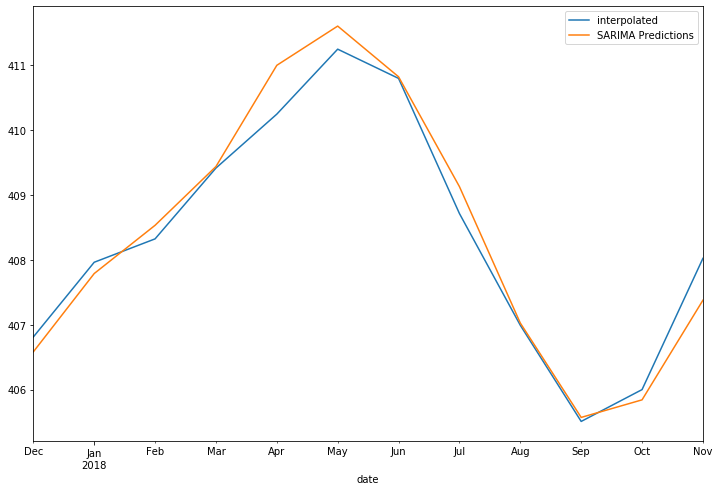

In [411]:
test['interpolated'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [412]:
from statsmodels.tools.eval_measures import rmse

In [413]:
error = rmse(test['interpolated'],predictions)

In [414]:
error

0.3458023426269715

In [415]:
test['interpolated'].mean()

408.3333333333333

In [416]:
model = SARIMAX(df['interpolated'],order=(0,1,1),seasona_order=(2, 0, [1, 2], 12))
results = model.fit()

In [417]:
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA FORECAST')

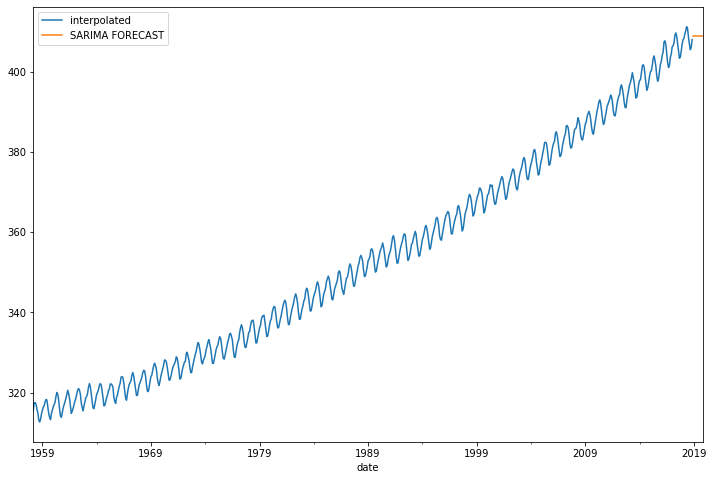

In [418]:
df['interpolated'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)

In [419]:
df = pd.read_csv('RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [420]:
df.index.freq = 'D'

In [421]:
df.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day   65.0   25.0   67.0  139.0   
2016-01-02  Saturday        0              na   24.0   39.0   43.0   85.0   
2016-01-03    Sunday        0              na   24.0   31.0   66.0   81.0   
2016-01-04    Monday        0              na   23.0   18.0   32.0   32.0   
2016-01-05   Tuesday        0              na    2.0   15.0   38.0   43.0   

            total  
date               
2016-01-01  296.0  
2016-01-02  191.0  
2016-01-03  202.0  
2016-01-04  105.0  
2016-01-05   98.0

In [422]:
df.tail()

weekday  holiday  holiday_name  rest1  rest2  rest3  rest4  \
date                                                                       
2017-05-27   Saturday        0            na    NaN    NaN    NaN    NaN   
2017-05-28     Sunday        0            na    NaN    NaN    NaN    NaN   
2017-05-29     Monday        1  Memorial Day    NaN    NaN    NaN    NaN   
2017-05-30    Tuesday        0            na    NaN    NaN    NaN    NaN   
2017-05-31  Wednesday        0            na    NaN    NaN    NaN    NaN   

            total  
date               
2017-05-27    NaN  
2017-05-28    NaN  
2017-05-29    NaN  
2017-05-30    NaN  
2017-05-31    NaN

In [423]:
df1 = df.dropna()

In [424]:
df1.tail()

weekday  holiday holiday_name  rest1  rest2  rest3  rest4  total
date                                                                          
2017-04-18    Tuesday        0           na   30.0   30.0   13.0   18.0   91.0
2017-04-19  Wednesday        0           na   20.0   11.0   30.0   18.0   79.0
2017-04-20   Thursday        0           na   22.0    3.0   19.0   46.0   90.0
2017-04-21     Friday        0           na   38.0   53.0   36.0   38.0  165.0
2017-04-22   Saturday        0           na   97.0   20.0   50.0   59.0  226.0

In [425]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [426]:
cols = ['rest1', 'rest2', 'rest3','rest4']

In [427]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [428]:
df1.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day     65     25     67    139   
2016-01-02  Saturday        0              na     24     39     43     85   
2016-01-03    Sunday        0              na     24     31     66     81   
2016-01-04    Monday        0              na     23     18     32     32   
2016-01-05   Tuesday        0              na      2     15     38     43   

            total  
date               
2016-01-01  296.0  
2016-01-02  191.0  
2016-01-03  202.0  
2016-01-04  105.0  
2016-01-05   98.0

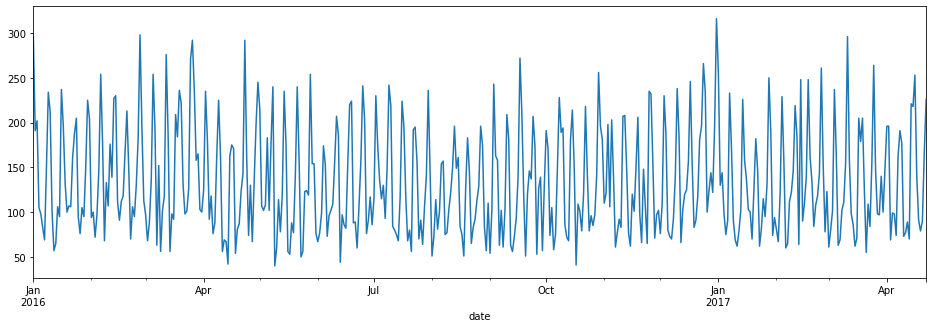

In [429]:
df1['total'].plot(figsize=(16,5))

In [430]:
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [431]:
df1[df1['holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

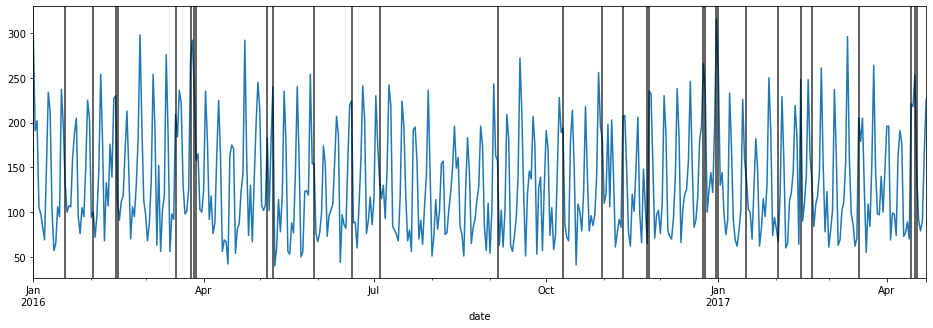

In [432]:
ax = df1['total'].plot(figsize=(16,5))
for day in df1.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.8);

In [433]:
from statsmodels.tsa.seasonal import seasonal_decompose

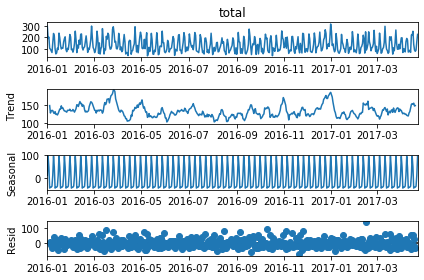

In [434]:
result = seasonal_decompose(df1['total'])
result.plot();

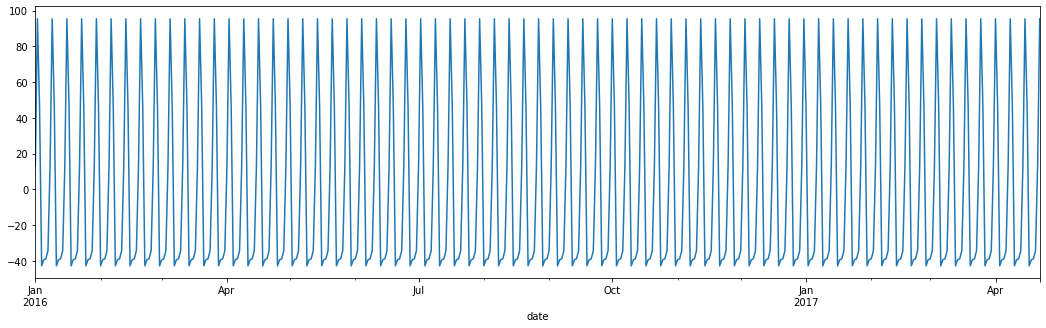

In [435]:
result.seasonal.plot(figsize=(18,5))

In [436]:
len(df1)

478

In [437]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [438]:
from pmdarima import auto_arima

In [439]:
auto_arima(df1['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2387.105
Date:                   Sat, 15 Aug 2020   AIC                           4782.211
Time:                           16:53:12   BIC                           4798.889
Sample:                                0   HQIC                          4788.768
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.9554      2.023      2.943      0.003       1.990       9.921
ar.S.L7        0.9543      0.015     62.493      0.000       0.924       0.984
ma.S.L7       -0.7330      0.054    -13.532      0.000      -0.839      -0.627
sigma2      1318.0895     84.030     15.686      0.000    1153.394    1482.785
===================================================================================
Ljung-Box (Q):                       72.85   Jarque-Bera (JB):                58.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.73
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [440]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [441]:
model = SARIMAX(train['total'],seasonal_order=(1, 0, [1], 7),enforce_invertibility=False)

In [442]:
results = model.fit()

In [443]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2155.511
Date:                             Sat, 15 Aug 2020   AIC                           4319.023
Time:                                     16:53:13   BIC                           4335.333
Sample:                                 01-01-2016   HQIC                          4325.460
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2194      0.043      5.067      0.000       0.135       0.304
ar.S.L7        0.9999      0.000   8036.503      0.000       1.000       1.000
ma.S.L7       -0.9405      0.023    -40.036      0.000      -0.987      -0.894
sigma2      1068.8369     54.343     19.668      0.000     962.326    1175.348
===================================================================================
Ljung-Box (Q):                       30.74   Jarque-Bera (JB):               106.77
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.77
Prob(H) (two-sided):                  0.61   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [444]:
start = len(train)
end = len(train) + len(test) - 1

In [445]:
predictions = results.predict(start,end).rename('SARIMA Model')

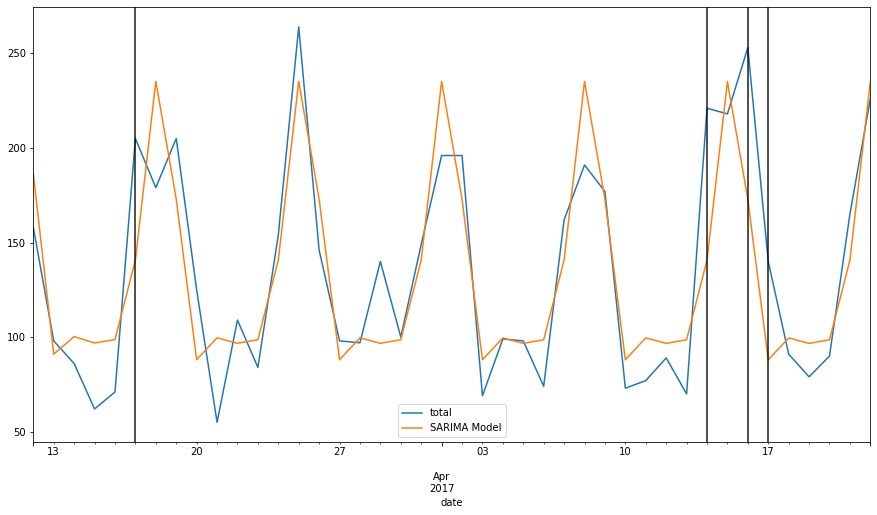

In [446]:
ax = test['total'].plot(legend=True,figsize=(15,8))
predictions.plot(legend=True)

for x in test.query('holiday==1').index:
    ax.axvline(x=x,color='black',alpha=0.9);

In [447]:
from statsmodels.tools.eval_measures import rmse

In [448]:
rmse(test['total'],predictions)

31.969149711926782

In [449]:
test['total'].mean()

134.26190476190476

In [450]:
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 3)x(2, 0, [1], 7)   Log Likelihood               -2298.382
Date:                             Sat, 15 Aug 2020   AIC                           4616.763
Time:                                     16:54:09   BIC                           4658.459
Sample:                                 01-01-2016   HQIC                          4633.156
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.7675      1.093      1.617      0.106      -0.375       3.910
holiday       89.1224      4.243     21.004      0.000      80.806      97.439
ar.L1         -0.9993      0.001   -821.945      0.000      -1.002      -0.997
ma.L1          1.1590      0.048     23.897      0.000       1.064       1.254
ma.L2          0.1583      0.068      2.320      0.020       0.025       0.292
ma.L3         -0.0330      0.050     -0.665      0.506      -0.130       0.064
ar.S.L7        0.9554      0.062     15.365      0.000       0.834       1.077
ar.S.L14       0.0367      0.060      0.607      0.544      -0.082       0.155
ma.S.L7       -0.8592      0.040    -21.747      0.000      -0.937      -0.782
sigma2       837.6498     51.899     16.140      0.000     735.929     939.371
===================================================================================
Ljung-Box (Q):                       46.64   Jarque-Bera (JB):                18.16
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.09
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [451]:
model = SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,3),seasonal_order=(2, 0, [1], 7),enforce_ivertibility=False)

In [452]:
result = model.fit()

In [453]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 3)x(2, 0, [1], 7)   Log Likelihood               -2084.880
Date:                             Sat, 15 Aug 2020   AIC                           4187.761
Time:                                     16:54:11   BIC                           4224.459
Sample:                                 01-01-2016   HQIC                          4202.244
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       67.8128      3.943     17.200      0.000      60.085      75.540
ar.L1          0.9710      0.026     36.837      0.000       0.919       1.023
ma.L1         -0.7752      0.055    -14.150      0.000      -0.883      -0.668
ma.L2         -0.1313      0.068     -1.937      0.053      -0.264       0.002
ma.L3         -0.0007      0.050     -0.014      0.989      -0.099       0.098
ar.S.L7        0.9964      0.062     15.961      0.000       0.874       1.119
ar.S.L14       0.0036      0.062      0.057      0.955      -0.119       0.126
ma.S.L7       -0.9706      0.028    -34.784      0.000      -1.025      -0.916
sigma2       773.5680     44.948     17.210      0.000     685.472     861.664
===================================================================================
Ljung-Box (Q):                       34.17   Jarque-Bera (JB):                19.70
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.22
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [454]:
start = len(train)
end = len(train) + len(test) - 1

In [455]:
predictions = result.predict(start,end,exog=test[['holiday']]).rename('SARIMAX with Exog')

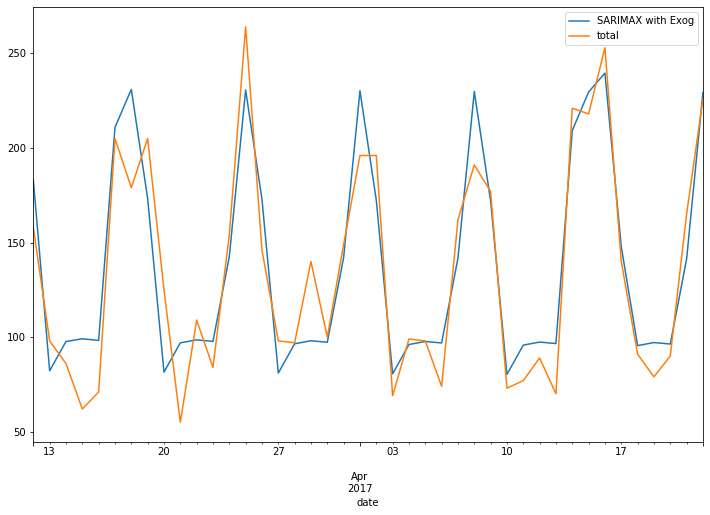

In [456]:
predictions.plot(figsize=(12,8),legend=True)
test['total'].plot(legend=True)

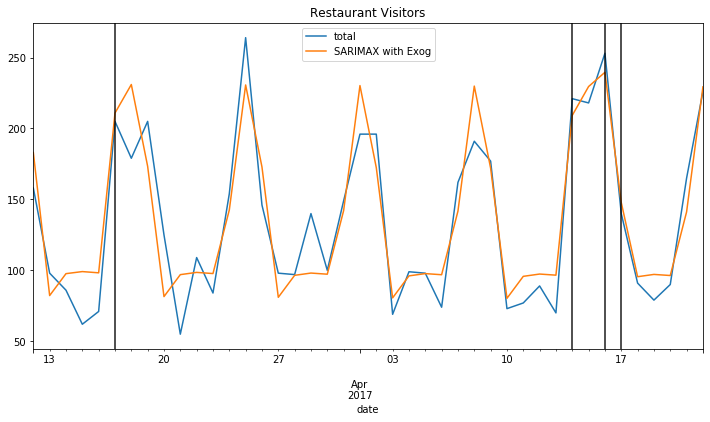

In [457]:
title = 'Restaurant Visitors'
ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
#ax.autoscale(axis='x',tight=True)
#ax.set(xlabel=xlabel,ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x,color='black',alpha=0.9);

In [458]:
rmse(test['total'],predictions)

22.831150293757215

In [459]:
model = SARIMAX(df1['total'],exog=df1[['holiday']],order=(1,0,3),seasonal_order=(2, 0, [1], 7),enforce_ivertibility=False)

In [460]:
results = model.fit()

In [461]:
exog_forecast = df[478:][['holiday']]

In [462]:
exog_forecast

holiday
date               
2017-04-23        0
2017-04-24        0
2017-04-25        0
2017-04-26        0
2017-04-27        0
2017-04-28        0
2017-04-29        0
2017-04-30        0
2017-05-01        0
2017-05-02        0
2017-05-03        0
2017-05-04        0
2017-05-05        1
2017-05-06        0
2017-05-07        0
2017-05-08        0
2017-05-09        0
2017-05-10        0
2017-05-11        0
2017-05-12        0
2017-05-13        0
2017-05-14        1
2017-05-15        0
2017-05-16        0
2017-05-17        0
2017-05-18        0
2017-05-19        0
2017-05-20        0
2017-05-21        0
2017-05-22        0
2017-05-23        0
2017-05-24        0
2017-05-25        0
2017-05-26        0
2017-05-27        0
2017-05-28        0
2017-05-29        1
2017-05-30        0
2017-05-31        0

In [463]:
fcast = results.predict(len(df1),len(df1)+38,exog=exog_forecast).rename('Final SARIMAX Forecast')

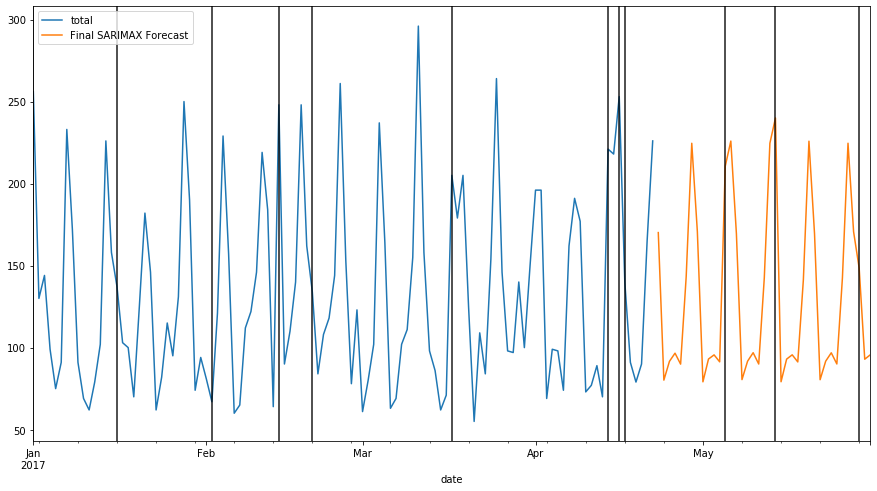

In [464]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(15,8),legend=True)
fcast.plot(legend=True)

for x in df.query('holiday==1').index:
    ax.axvline(x=x,color='black',alpha=0.9);

In [465]:
df = pd.read_csv('M2SLMoneyStock.csv',index_col=0,parse_dates=True)
df.index.freq = 'MS'

In [466]:
sp = pd.read_csv('PCEPersonalSpending.csv',index_col=0,parse_dates=True)
sp.index.freq = 'MS'

In [467]:
 df.head()

Money
Date              
1995-01-01  3492.4
1995-02-01  3489.9
1995-03-01  3491.1
1995-04-01  3499.2
1995-05-01  3524.2

In [468]:
sp.head()

Spending
Date                
1995-01-01    4851.2
1995-02-01    4850.8
1995-03-01    4885.4
1995-04-01    4890.2
1995-05-01    4933.1

In [469]:
df = df.join(sp)

In [470]:
df

Money  Spending
Date                         
1995-01-01   3492.4    4851.2
1995-02-01   3489.9    4850.8
1995-03-01   3491.1    4885.4
1995-04-01   3499.2    4890.2
1995-05-01   3524.2    4933.1
...             ...       ...
2015-08-01  12096.8   12394.0
2015-09-01  12153.8   12392.8
2015-10-01  12187.7   12416.1
2015-11-01  12277.4   12450.1
2015-12-01  12335.9   12469.1

[252 rows x 2 columns]

In [471]:
df.shape

(252, 2)

In [472]:
df = df.dropna()

In [473]:
df.shape

(252, 2)

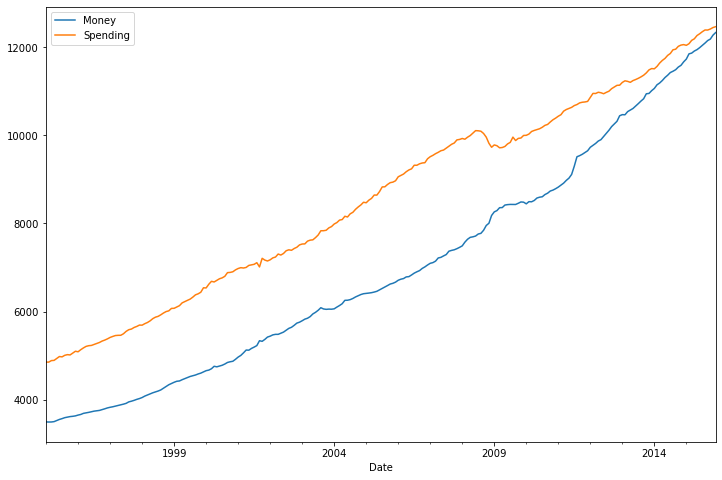

In [474]:
df.plot(figsize=(12,8))

In [475]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
def adf_test(series,title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistic', 'p=value', '# lags used', '#observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        print(out.to_string())
        if result[1] <= 0.05:
            print('strong evidence against the null hypothesis')
            print('reject the null hypothesis')
            print('data has no unit root and is stationary ')
        else:
            print('weak evidence against the null hypothesis')
            print('fail to reject the null hypothesis')
            print('data has a unit root and is non-stationary ')

In [476]:
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic       4.239022
p=value                  1.000000
# lags used              4.000000
#observations          247.000000
critical value (1%)     -3.457105
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non-stationary 
ADF test statistic       4.239022
p=value                  1.000000
# lags used              4.000000
#observations          247.000000
critical value (1%)     -3.457105
critical value (5%)     -2.873314
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non-stationary 
ADF test statistic        4.239022
p=value                   1.000000
# lags used               4.000000
#observations           247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non

In [477]:
adf_test(df['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic       0.149796
p=value                  0.969301
# lags used              3.000000
#observations          248.000000
critical value (1%)     -3.456996
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non-stationary 
ADF test statistic       0.149796
p=value                  0.969301
# lags used              3.000000
#observations          248.000000
critical value (1%)     -3.456996
critical value (5%)     -2.873266
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non-stationary 
ADF test statistic        0.149796
p=value                   0.969301
# lags used               3.000000
#observations           248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non

In [478]:
df_transformed = df.diff()

In [479]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -2.057404
p=value                  0.261984
# lags used             15.000000
#observations          235.000000
critical value (1%)     -3.458487
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non-stationary 
ADF test statistic      -2.057404
p=value                  0.261984
# lags used             15.000000
#observations          235.000000
critical value (1%)     -3.458487
critical value (5%)     -2.873919
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non-stationary 
ADF test statistic       -2.057404
p=value                   0.261984
# lags used              15.000000
#observations           235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non

In [480]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic    -7.226974e+00
p=value                2.041027e-10
# lags used            2.000000e+00
#observations          2.480000e+02
critical value (1%)   -3.456996e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 
ADF test statistic    -7.226974e+00
p=value                2.041027e-10
# lags used            2.000000e+00
#observations          2.480000e+02
critical value (1%)   -3.456996e+00
critical value (5%)   -2.873266e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 
ADF test statistic     -7.226974e+00
p=value                 2.041027e-10
# lags used             2.000000e+00
#observations           2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit ro

In [481]:
df_transformed = df_transformed.diff().dropna()

In [482]:
df_transformed

Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7
...           ...       ...
2015-08-01   -0.7      -8.5
2015-09-01    5.5     -39.8
2015-10-01  -23.1      24.5
2015-11-01   55.8      10.7
2015-12-01  -31.2     -15.0

[250 rows x 2 columns]

In [483]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic    -7.077471e+00
p=value                4.760675e-10
# lags used            1.400000e+01
#observations          2.350000e+02
critical value (1%)   -3.458487e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 
ADF test statistic    -7.077471e+00
p=value                4.760675e-10
# lags used            1.400000e+01
#observations          2.350000e+02
critical value (1%)   -3.458487e+00
critical value (5%)   -2.873919e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 
ADF test statistic     -7.077471e+00
p=value                 4.760675e-10
# lags used             1.400000e+01
#observations           2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit ro

In [484]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic    -8.760145e+00
p=value                2.687900e-14
# lags used            8.000000e+00
#observations          2.410000e+02
critical value (1%)   -3.457779e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 
ADF test statistic    -8.760145e+00
p=value                2.687900e-14
# lags used            8.000000e+00
#observations          2.410000e+02
critical value (1%)   -3.457779e+00
critical value (5%)   -2.873609e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit root and is stationary 
ADF test statistic     -8.760145e+00
p=value                 2.687900e-14
# lags used             8.000000e+00
#observations           2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit ro

In [485]:
nobs = 12

In [486]:
train = df_transformed[:-nobs]
test = df_transformed[-nobs:]

In [487]:
model = VAR(train)

for p in [1,2,3,4,5,6,7]:
    
    results = model.fit(p)
    print(f'ORDER {p}')
    print(f'AIC: {results.aic}')
    print('\n')

ORDER 1
AIC: 14.178610495220896


ORDER 2
AIC: 13.955189367163705


ORDER 3
AIC: 13.849518291541038


ORDER 4
AIC: 13.827950574458283


ORDER 5
AIC: 13.78730034460964


ORDER 6
AIC: 13.799076756885809


ORDER 7
AIC: 13.797638727913972




In [488]:
results = model.fit(5)

In [489]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 15, Aug, 2020
Time:                     16:54:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [490]:
lagged_values = train.values[-5:]

In [491]:
z = results.forecast(y=lagged_values,steps=12)

In [492]:
idx = pd.date_range('2015-01-01',periods=12,freq='MS')

In [493]:
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [494]:
df_forecast = pd.DataFrame(data=z,index=idx,columns=['Money_2d','Spending_2d'])

In [495]:
df_forecast

Money_2d  Spending_2d
2015-01-01 -16.995276    36.149820
2015-02-01  -3.174038   -11.450298
2015-03-01  -0.377725    -6.684969
2015-04-01  -2.602233     5.479458
2015-05-01   4.228557    -2.443365
2015-06-01   1.559393     0.387639
2015-07-01  -0.998410     3.883680
2015-08-01   0.364510    -2.356101
2015-09-01  -1.210627    -1.224147
2015-10-01   0.225877     0.786927
2015-11-01   1.338939     0.180974
2015-12-01  -0.218585     0.212750

In [496]:
# Add the most recent first difference from the training set to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1] - df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()
# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [497]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [498]:
df_forecast.head()

Money_2d  Spending_2d    Money1d  MoneyForecast  Spending1d  \
2015-01-01 -16.995276    36.149820  61.604724   11731.704724   46.749820   
2015-02-01  -3.174038   -11.450298  58.430686   11790.135410   35.299522   
2015-03-01  -0.377725    -6.684969  58.052961   11848.188371   28.614552   
2015-04-01  -2.602233     5.479458  55.450728   11903.639099   34.094010   
2015-05-01   4.228557    -2.443365  59.679285   11963.318384   31.650645   

            SpendingForecast  
2015-01-01      12108.749820  
2015-02-01      12144.049342  
2015-03-01      12172.663894  
2015-04-01      12206.757904  
2015-05-01      12238.408549

In [499]:
test_range = df[-nobs:]

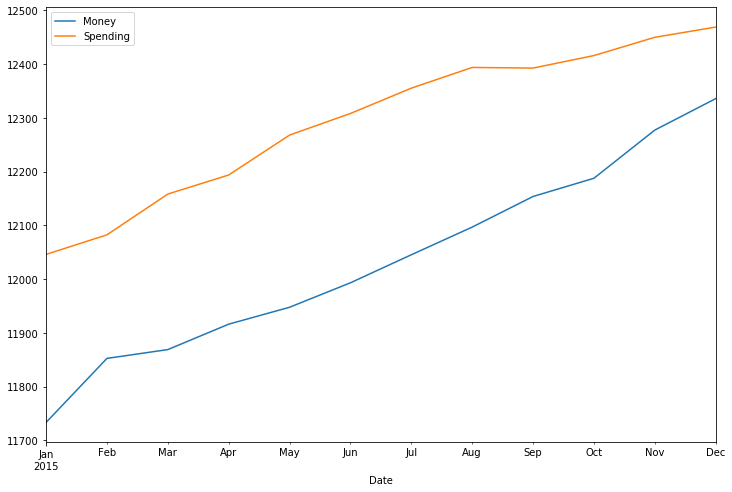

In [500]:
test_range.plot(figsize=(12,8))

In [501]:
df_forecast.columns

Index(['Money_2d', 'Spending_2d', 'Money1d', 'MoneyForecast', 'Spending1d',
       'SpendingForecast'],
      dtype='object')

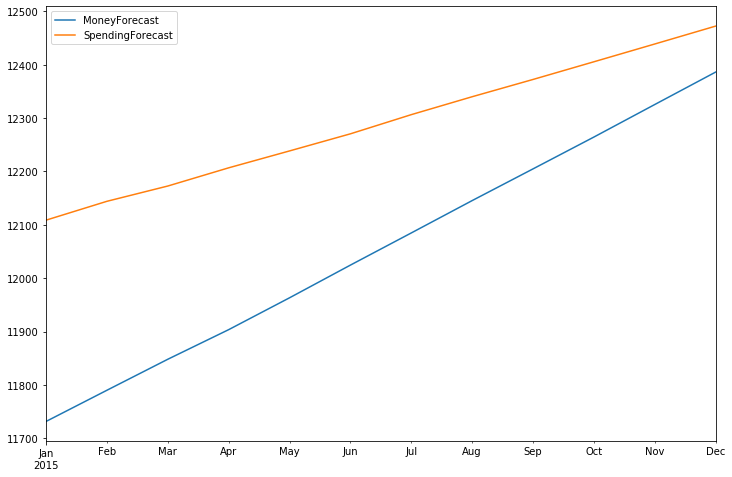

In [502]:
df_forecast[['MoneyForecast','SpendingForecast']].plot(figsize=(12,8))

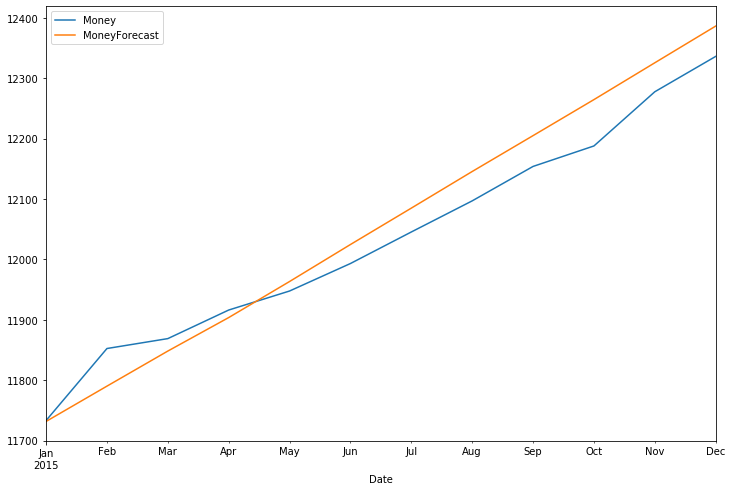

In [503]:
test_range['Money'].plot(legend=True,figsize=(12,8))
df_forecast['MoneyForecast'].plot(legend=True)

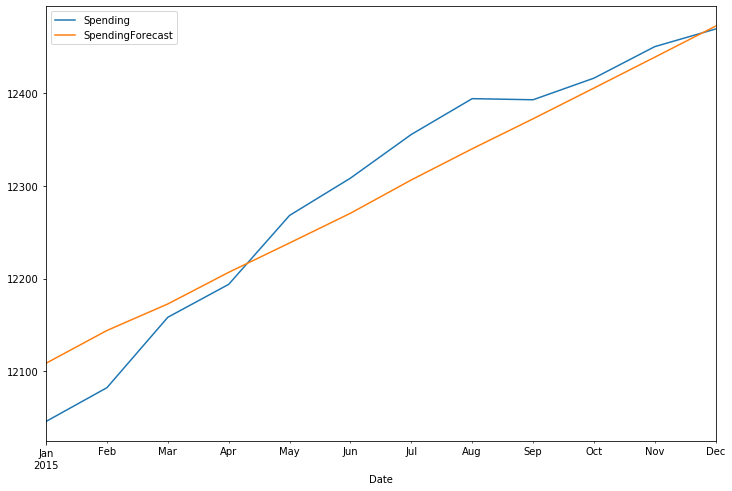

In [504]:
test_range['Spending'].plot(legend=True,figsize=(12,8))
df_forecast['SpendingForecast'].plot(legend=True)

In [505]:
rmse(test_range['Money'],df_forecast['MoneyForecast'])

43.71049653558938

In [506]:
test_range['Money'].mean()

12034.008333333333

In [507]:
rmse(test_range['Spending'],df_forecast['SpendingForecast'])

37.00117516940808

In [508]:
test_range['Spending'].mean()

12294.533333333333